## TMDB 5000 Movie Dataset Analysis by Shromana Majumder (31.03.24)

## Problem Statement

Producing a movie costs a lot of money and is a risky investment with possibly high reward. Therefore predicting if a movie wil be a box office success is an important question for the film industry. 
On the other hand, for the film enthusiasts the quality of the movie is the most important, so the objective is also to predict if a movie will be highly rated.

## Data Wrangling

### Importing Libraries

In [419]:
!pip install cpi


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [420]:
import json
import cpi
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor, to_graphviz,plot_importance
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## Load the data

### Load the movies

In [421]:
movie_path = "tmdb_5000_movies.csv"

In [422]:
movie_df = pd.read_csv(movie_path)
movie_df.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [423]:
# Check the shape
movie_df.shape

(4803, 20)

In [424]:
# Check for detailed info
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [425]:
movie_df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

* release_date variable should be of the form datetime

In [426]:
#Statistical Description
movie_df.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max       10.000000  13752.000000

In [427]:
movie_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

### Check for unique values

In [428]:
movie_df.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

1. While there are 4803 movies in total, there are only 4800 unique titles and which suggest the presence of duplicates
2. There are 4800 titles but 4801 original titles which suggests further investigation in the 2 variables
3. There are 4802 unique popularity values instead of 4803 which suggests presence of duplicates
4. Status has only 3 unique values which needs further investigation to find if we need all the observations or some of them can be removed

## Data Preprocessing

### Check for the duplicates

In [429]:
sum(movie_df.duplicated())

0

* No Duplicates

### Null values

In [430]:
movie_df.apply(lambda x: sum(x.isna()),axis=0)

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

* Homepage and tagline have large no of missing values

#### Runtime null values

In [431]:
movie_df.loc[movie_df.runtime.isnull()]

budget                               genres homepage      id  \
2656  15000000        [{"id": 18, "name": "Drama"}]      NaN  370980   
4140         2  [{"id": 99, "name": "Documentary"}]      NaN  459488   

                                               keywords original_language  \
2656  [{"id": 717, "name": "pope"}, {"id": 5565, "na...                it   
4140  [{"id": 6027, "name": "music"}, {"id": 225822,...                en   

                                  original_title overview  popularity  \
2656  Chiamatemi Francesco - Il Papa della gente      NaN    0.738646   
4140                 To Be Frank, Sinatra at 100      NaN    0.050625   

                                  production_companies  \
2656            [{"name": "Taodue Film", "id": 45724}]   
4140  [{"name": "Eyeline Entertainment", "id": 60343}]   

                                  production_countries release_date  revenue  \
2656           [{"iso_3166_1": "IT", "name": "Italy"}]   2015-12-03        0   
4140  [{"iso_3166_1": "GB", "name": "United Kingdom"}]   2015-12-12        0   

      runtime                               spoken_languages    status  \
2656      NaN  [{"iso_639_1": "es", "name": "Espa\u00f1ol"}]  Released   
4140      NaN                                             []  Released   

     tagline                                       title  vote_average  \
2656     NaN  Chiamatemi Francesco - Il Papa della gente           7.3   
4140     NaN                 To Be Frank, Sinatra at 100           0.0   

      vote_count  
2656          12  
4140           0

* set them to the mean runtime

In [432]:
movie_df.runtime.fillna(movie_df.runtime.mean(),inplace=True)

### Release date null value

In [433]:
movie_df.loc[movie_df.release_date.isnull()]

budget genres homepage      id keywords original_language  \
4553       0     []      NaN  380097       []                en   

                  original_title  \
4553  America Is Still the Place   

                                               overview  popularity  \
4553  1971 post civil rights San Francisco seemed li...         0.0   

     production_companies production_countries release_date  revenue  runtime  \
4553                   []                   []          NaN        0      0.0   

     spoken_languages    status tagline                       title  \
4553               []  Released     NaN  America Is Still the Place   

      vote_average  vote_count  
4553           0.0           0

 * drop the null value

In [434]:
movie_df= movie_df.loc[movie_df.release_date.notnull()]

#### Overview null values

* fix the null values using Unspecified

In [435]:
movie_df.overview.fillna("Unsepecified",inplace=True)

### Zero values

In [436]:
movie_df.apply(lambda x: sum(x==0),axis=0)

budget                  1036
genres                     0
homepage                   0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                 1426
runtime                   34
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average              62
vote_count                61
dtype: int64

* Budget And Revenue have Zero values

#### Revenue and budget

In [437]:
movie_df.query('revenue == 0 or budget == 0').count()

budget                  1573
genres                  1573
homepage                 365
id                      1573
keywords                1573
original_language       1573
original_title          1573
overview                1573
popularity              1573
production_companies    1573
production_countries    1573
release_date            1573
revenue                 1573
runtime                 1573
spoken_languages        1573
status                  1573
tagline                  975
title                   1573
vote_average            1573
vote_count              1573
dtype: int64

* There are quite many observations where budget and revenue have zero values

Since primary objective is predicting revenue, I will drop the zero valued revenues and budgets

In [438]:
outlier_thresh=500
movie_df=movie_df[movie_df.budget>outlier_thresh]
movie_df=movie_df[movie_df.revenue>outlier_thresh]
len(movie_df)

3211

### Profit
* 𝑟𝑒𝑣𝑒𝑛𝑢𝑒−𝑏𝑢𝑑𝑔𝑒𝑡=𝑝𝑟𝑜𝑓𝑖𝑡

In [439]:
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']
movie_df.profit.head(2)

0    2550965087
1     661000000
Name: profit, dtype: int64

In [440]:
zero_vals=movie_df.apply(lambda x: sum(x==0),axis=0)
zero_vals[zero_vals>0]

vote_average    2
vote_count      2
dtype: int64

* Vote count and average have zero values

In [441]:
movie_df=movie_df[movie_df.vote_count>0]

In [442]:
zero_vals=movie_df.apply(lambda x: sum(x==0),axis=0)
zero_vals[zero_vals>0]

Series([], dtype: int64)

No more zero values

### Count of each unique value in the status

In [443]:
movie_df.status.value_counts()

Released           3208
Post Production       1
Name: status, dtype: int64

* Almost all the obseravtions  belong to Released status.

### Check the instances where original title do not match with title column

In [444]:
movie_df[['original_title', 'title']].query('original_title != title')

original_title                                   title
97                           シン・ゴジラ                           Shin Godzilla
215    4: Rise of the Silver Surfer  Fantastic 4: Rise of the Silver Surfer
235     Astérix aux Jeux Olympiques            Asterix at the Olympic Games
317                           金陵十三釵                      The Flowers of War
488          Arthur et les Minimoys               Arthur and the Invisibles
...                             ...                                     ...
4482  L.I.E. Long Island Expressway                                  L.I.E.
4535                           七人の侍                           Seven Samurai
4672        Per un pugno di dollari                    A Fistful of Dollars
4695                  بچه‌های آسمان                      Children of Heaven
4792                            キュア                                    Cure

[105 rows x 2 columns]

### Filter  with status 'Released'

In [445]:
movie_df = movie_df[movie_df['status'] == "Released"]
movie_df.head(2)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies  ... release_date  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   2009-12-10   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   2007-05-19   

      revenue  runtime                                   spoken_languages  \
0  2787965087    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1   961000000    169.0           [{"iso_639_1": "en", "name": "English"}]   

     status                                         tagline  \
0  Released                     Enter the World of Pandora.   
1  Released  At the end of the world, the adventure begins.   

                                      title vote_average  vote_count  \
0                                    Avatar          7.2       11800   
1  Pirates of the Caribbean: At World's End          6.9        4500   

       profit  
0  2550965087  
1   661000000  

[2 rows x 21 columns]

### JSON Handling

In [446]:
columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']

for col in columns: 
    movie_df[col] = movie_df[col].apply(json.loads)



### Convering to date time format

In [447]:
movie_df['release_date'] =  pd.to_datetime(movie_df['release_date'], format ='%Y-%m-%d')

In [448]:
movie_df['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

A movie can have several genres.

In [449]:
movie_df['keywords'][0]

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [450]:
#Extract the names from the json data
for col in columns: 
    movie_df[col] = movie_df[col].map(lambda x:[i['name'] for i in x])

movie_df.head()

budget                                         genres  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]   
1  300000000                   [Adventure, Fantasy, Action]   
2  245000000                     [Action, Adventure, Crime]   
3  250000000               [Action, Crime, Drama, Thriller]   
4  260000000           [Action, Adventure, Science Fiction]   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [culture clash, future, space war, space colon...                en   
1  [ocean, drug abuse, exotic island, east india ...                en   
2  [spy, based on novel, secret agent, sequel, mi...                en   
3  [dc comics, crime fighter, terrorist, secret i...                en   
4  [based on novel, mars, medallion, space travel...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... release_date  \
0  [Ingenious Film Partners, Twentieth Century Fo...  ...   2009-12-10   
1  [Walt Disney Pictures, Jerry Bruckheimer Films...  ...   2007-05-19   
2                   [Columbia Pictures, Danjaq, B24]  ...   2015-10-26   
3  [Legendary Pictures, Warner Bros., DC Entertai...  ...   2012-07-16   
4                             [Walt Disney Pictures]  ...   2012-03-07   

      revenue  runtime                                 spoken_languages  \
0  2787965087    162.0                               [English, Español]   
1   961000000    169.0                                        [English]   
2   880674609    148.0  [Français, English, Español, Italiano, Deutsch]   
3  1084939099    165.0                                        [English]   
4   284139100    132.0                                        [English]   

     status                                         tagline  \
0  Released                     Enter the World of Pandora.   
1  Released  At the end of the world, the adventure begins.   
2  Released                           A Plan No One Escapes   
3  Released                                 The Legend Ends   
4  Released            Lost in our world, found in another.   

                                      title vote_average  vote_count  \
0                                    Avatar          7.2       11800   
1  Pirates of the Caribbean: At World's End          6.9        4500   
2                                   Spectre          6.3        4466   
3                     The Dark Knight Rises          7.6        9106   
4                               John Carter          6.1        2124   

       profit  
0  2550965087  
1   661000000  
2   635674609  
3   834939099  
4    24139100  

[5 rows x 21 columns]

### Extract year, month and day of year from release date

In [451]:
movie_df['year'] = movie_df['release_date'].map(lambda dates: dates.year)

In [452]:
movie_df['release_date'] = movie_df['release_date'].map(lambda dates: datetime.datetime.strptime(str(dates), '%Y-%m-%d %H:%M:%S'))
movie_df['day_of_year'] = movie_df['release_date'].map(lambda dates: dates.timetuple().tm_yday)

movie_df['year'] = movie_df['release_date'].map(lambda dates: dates.year)

In [453]:
movie_df['month'] = movie_df['release_date'].map(lambda dates: dates.month)

In [454]:
movie_df['date'] = movie_df['release_date'].map(lambda dates: dates.day)

In [455]:
movie_df['day'] = movie_df['release_date'].dt.day_name()

In [456]:
movie_df.head(2)

budget                                         genres  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]   
1  300000000                   [Adventure, Fantasy, Action]   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [culture clash, future, space war, space colon...                en   
1  [ocean, drug abuse, exotic island, east india ...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies  ...  \
0  [Ingenious Film Partners, Twentieth Century Fo...  ...   
1  [Walt Disney Pictures, Jerry Bruckheimer Films...  ...   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   

       profit  year day_of_year month  date       day  
0  2550965087  2009         344    12    10  Thursday  
1   661000000  2007         139     5    19  Saturday  

[2 rows x 26 columns]

## Correlation

C:\Users\shromana\AppData\Local\Temp\ipykernel_11936\2740118235.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=movie_df.corr()


<Axes: >

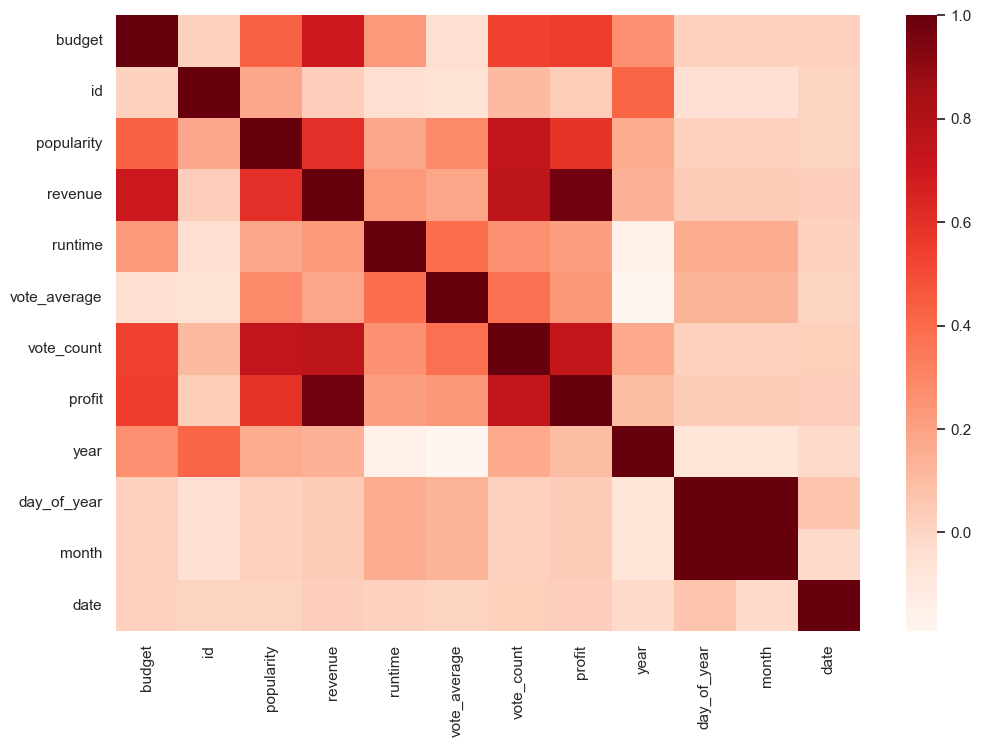

In [457]:
corr=movie_df.corr()
fig, ax =plt.subplots(figsize=(12,8))
sns.heatmap(corr, cmap="Reds",
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        square=False   )

* Revenue is positively correlated with vote count and budget
* Profit is positively correlated  with Revenue

## Load the credits 

In [458]:
credits_path = "tmdb_5000_credits.csv"

In [459]:
credits_df = pd.read_csv(credits_path)
credits_df.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [460]:
# Check the shape 
credits_df.shape

(4803, 4)

In [461]:
# Check for detailed info 
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [462]:
credits_df.dtypes

movie_id     int64
title       object
cast        object
crew        object
dtype: object

In [463]:
credits_df['crew'][0][:700]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "M'

In [464]:
credits_df.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [465]:
# Check for unique values
credits_df.nunique()

movie_id    4803
title       4800
cast        4761
crew        4776
dtype: int64

* While there are 4803 movies in total, there are only 4800 unique titles which suggest the presence of duplicates

### Check for the duplicates

In [466]:
sum(credits_df.duplicated())

0

### Null values

In [467]:
credits_df.apply(lambda x: sum(x.isna()),axis=0)

movie_id    0
title       0
cast        0
crew        0
dtype: int64

* No Null Values

In [468]:
columns = ['cast', 'crew']

for col in columns: 
    credits_df[col] = credits_df[col].apply(json.loads)
    
credits_df['cast'] = credits_df['cast'].map(lambda x:[ [i['name'],i['gender']] for i in x])
credits_df['crew'] = credits_df['crew'].map(lambda x:[ [i['name'],i['job'],i['department'],i['gender']] for i in x])

In [469]:
credits_df.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...   
1  [[Johnny Depp, 2], [Orlando Bloom, 2], [Keira ...   
2  [[Daniel Craig, 2], [Christoph Waltz, 2], [Léa...   
3  [[Christian Bale, 2], [Michael Caine, 2], [Gar...   
4  [[Taylor Kitsch, 2], [Lynn Collins, 1], [Saman...   

                                                crew  
0  [[Stephen E. Rivkin, Editor, Editing, 0], [Ric...  
1  [[Dariusz Wolski, Director of Photography, Cam...  
2  [[Thomas Newman, Original Music Composer, Soun...  
3  [[Hans Zimmer, Original Music Composer, Sound,...  
4  [[Andrew Stanton, Screenplay, Writing, 2], [An...

In [470]:
credits_df.cast[0][:5]

[['Sam Worthington', 2],
 ['Zoe Saldana', 1],
 ['Sigourney Weaver', 1],
 ['Stephen Lang', 2],
 ['Michelle Rodriguez', 1]]

In [471]:
credits_df.crew[0][:5]

[['Stephen E. Rivkin', 'Editor', 'Editing', 0],
 ['Rick Carter', 'Production Design', 'Art', 2],
 ['Christopher Boyes', 'Sound Designer', 'Sound', 0],
 ['Christopher Boyes', 'Supervising Sound Editor', 'Sound', 0],
 ['Mali Finn', 'Casting', 'Production', 1]]

According to TMDB, 0 corresponds to 'not set', 1 to 'Female' and 2 to 'Male'.

## Exploratory Data Analysis

### Movie title

In [472]:
count_title = movie_df.groupby('title').title.count()
count_title[count_title != 1]

title
The Host    2
Name: title, dtype: int64

* Some movies have the same title

In [473]:
double_title = count_title[count_title != 1].index.values

Making the title unique by appending the release year

In [474]:
movie_df.title = movie_df.apply(lambda row: row.title+'_'+str(row.release_date) if (row.title in double_title) else row.title,axis = 1)

In [475]:
count_title = movie_df.groupby('title').title.count()
count_title[count_title != 1]

Series([], Name: title, dtype: int64)

## Visualisation

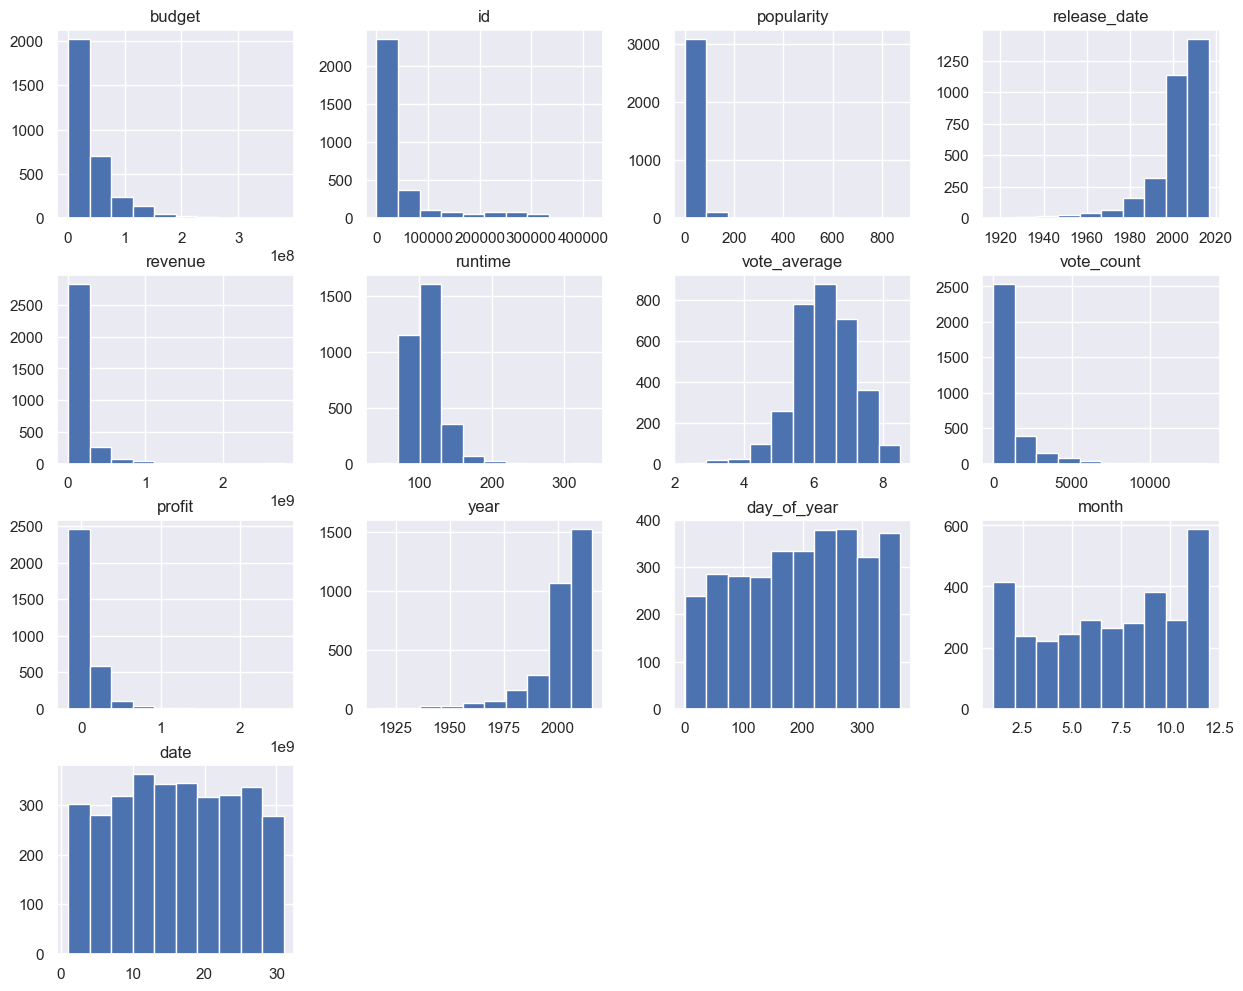

In [476]:
movie_df.hist(figsize = (15,12));

### Scatter plot

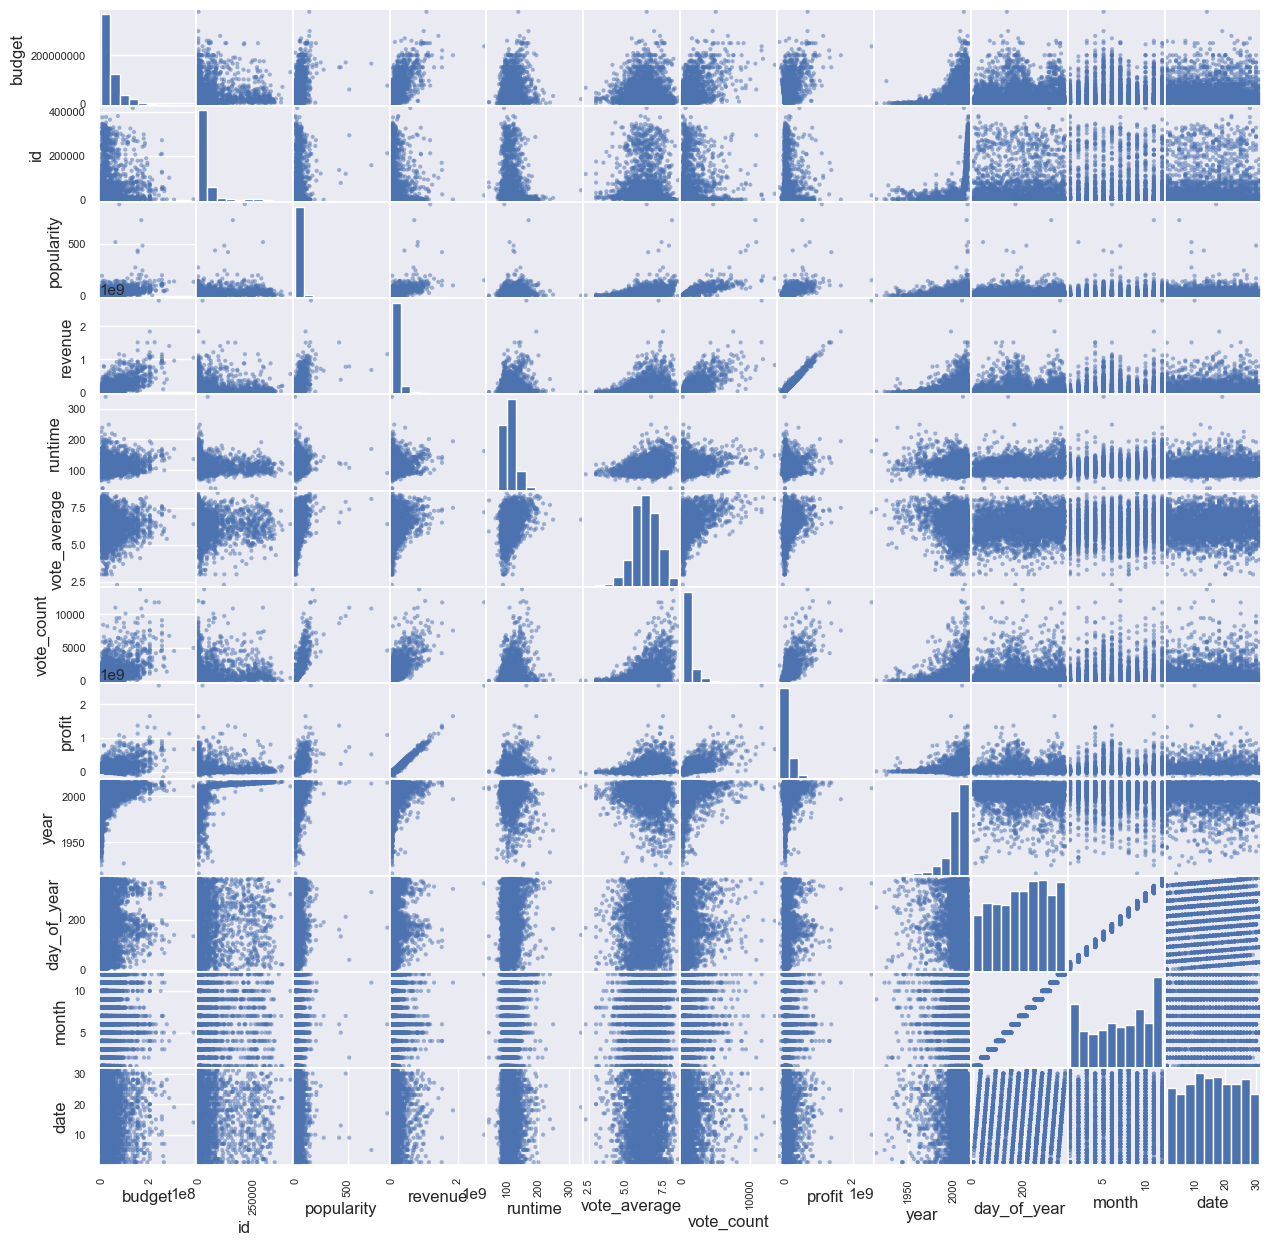

In [477]:
pd.plotting.scatter_matrix(movie_df, figsize = (15,15));

1. Profit vs Popularity shows positive but low correlation.
2. Profit vs Revenue shows the highest positive correlation
3. Profit vs Runtime show positive but very low correlation
4. Vote Average vs Runtime also show positive but low correlation
5. Popularity vs runtime also has very low but positive correlation

### Which weekdays as release days turn out to be most lucky for movies in terms of popularity and profit?

In [478]:
movie_df.head()

budget                                         genres  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]   
1  300000000                   [Adventure, Fantasy, Action]   
2  245000000                     [Action, Adventure, Crime]   
3  250000000               [Action, Crime, Drama, Thriller]   
4  260000000           [Action, Adventure, Science Fiction]   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [culture clash, future, space war, space colon...                en   
1  [ocean, drug abuse, exotic island, east india ...                en   
2  [spy, based on novel, secret agent, sequel, mi...                en   
3  [dc comics, crime fighter, terrorist, secret i...                en   
4  [based on novel, mars, medallion, space travel...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ...  \
0  [Ingenious Film Partners, Twentieth Century Fo...  ...   
1  [Walt Disney Pictures, Jerry Bruckheimer Films...  ...   
2                   [Columbia Pictures, Danjaq, B24]  ...   
3  [Legendary Pictures, Warner Bros., DC Entertai...  ...   
4                             [Walt Disney Pictures]  ...   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   
2                                   Spectre           6.3        4466   
3                     The Dark Knight Rises           7.6        9106   
4                               John Carter           6.1        2124   

       profit  year day_of_year month  date        day  
0  2550965087  2009         344    12    10   Thursday  
1   661000000  2007         139     5    19   Saturday  
2   635674609  2015         299    10    26     Monday  
3   834939099  2012         198     7    16     Monday  
4    24139100  2012          67     3     7  Wednesday  

[5 rows x 26 columns]

In [479]:
df1 = movie_df.groupby('day')[['day', 'profit', 'popularity']]
df1.head()

day      profit  popularity
0     Thursday  2550965087  150.437577
1     Saturday   661000000  139.082615
2       Monday   635674609  107.376788
3       Monday   834939099  112.312950
4    Wednesday    24139100   43.926995
5      Tuesday   632871626  115.699814
6    Wednesday   331794936   48.681969
7    Wednesday  1125403694  134.279229
8      Tuesday   683959197   98.885637
9    Wednesday   623260194  155.790452
10   Wednesday   121081192   57.925623
11    Thursday   386090727  107.928811
12     Tuesday   865659812  145.847379
15    Thursday   194651413   53.978602
17    Saturday   665713802  135.413856
23     Tuesday   192234864   42.990906
25     Tuesday  1645034188  100.025899
29    Thursday   908561013   93.004993
30      Friday   583766341   35.149586
31    Thursday  1015439994   77.682080
35      Friday   686297228   21.939663
39      Friday   230062763   73.795050
40    Saturday   359852396   49.986590
47      Sunday   277365246   78.291018
49      Friday   246040419   61.196071
54    Saturday   156926147   51.692953
57      Sunday   341311860   66.390712
59    Saturday   569653595   45.274225
75      Friday    89218220   44.640292
86      Sunday   587600867   44.041186
98      Monday   771103568  108.849621
100     Monday   183932083   60.269279
110     Monday   309220945   34.206690
112     Sunday    12298192   39.019229
136     Sunday   137594577   29.332905

In [480]:
df2 = df1.mean()
df2

C:\Users\shromana\AppData\Local\Temp\ipykernel_11936\964720093.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df1.mean()


profit  popularity
day                                
Friday     5.010986e+07   21.983789
Monday     9.553233e+07   28.695557
Saturday   8.285653e+07   27.135113
Sunday     6.363344e+07   23.352831
Thursday   8.432366e+07   31.204928
Tuesday    1.299900e+08   38.262862
Wednesday  1.266009e+08   41.063733

In [481]:
pf_mean = movie_df.profit.mean()
pf_mean

81130482.96041147

In [482]:
pt_mean = movie_df.popularity.mean()
pt_mean

29.186563034912716

In [483]:
ind = np.arange(len(df1.nunique()['day']))
width = 0.35
ind + width

array([0.35, 1.35, 2.35, 3.35, 4.35, 5.35, 6.35])

In [484]:
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

In [485]:
df2['day_id'] = df2.index
df2['day_id'] = df2['day_id'].map(sorterIndex)
df2

profit  popularity  day_id
day                                        
Friday     5.010986e+07   21.983789       4
Monday     9.553233e+07   28.695557       0
Saturday   8.285653e+07   27.135113       5
Sunday     6.363344e+07   23.352831       6
Thursday   8.432366e+07   31.204928       3
Tuesday    1.299900e+08   38.262862       1
Wednesday  1.266009e+08   41.063733       2

In [486]:
df2.sort_values('day_id', inplace = True)
df2

profit  popularity  day_id
day                                        
Monday     9.553233e+07   28.695557       0
Tuesday    1.299900e+08   38.262862       1
Wednesday  1.266009e+08   41.063733       2
Thursday   8.432366e+07   31.204928       3
Friday     5.010986e+07   21.983789       4
Saturday   8.285653e+07   27.135113       5
Sunday     6.363344e+07   23.352831       6

### Movies Profit Comparison on different weekdays as release days

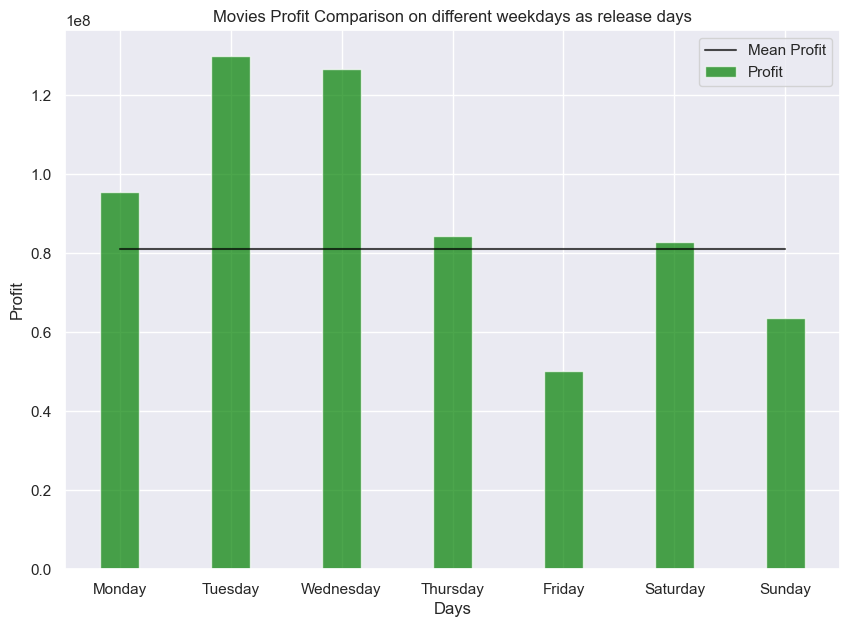

In [487]:
# Define the figure size
plt.figure(figsize=(10, 7))

# Plot the bars and the line
pro = plt.bar(ind, df2['profit'], width, color = 'green', alpha=.7, label='Profit')
plt.plot(ind, np.repeat(pf_mean, 7), '-', color = 'black',  alpha=.7, label='Mean Profit')

# Define labels, xticks and title
plt.ylabel('Profit')
plt.xlabel('Days')
plt.title('Movies Profit Comparison on different weekdays as release days')
plt.xticks(ind, df2.index)

#Plot the legend
plt.legend()

### Movies Popularity Comparison on different weekdays as release days

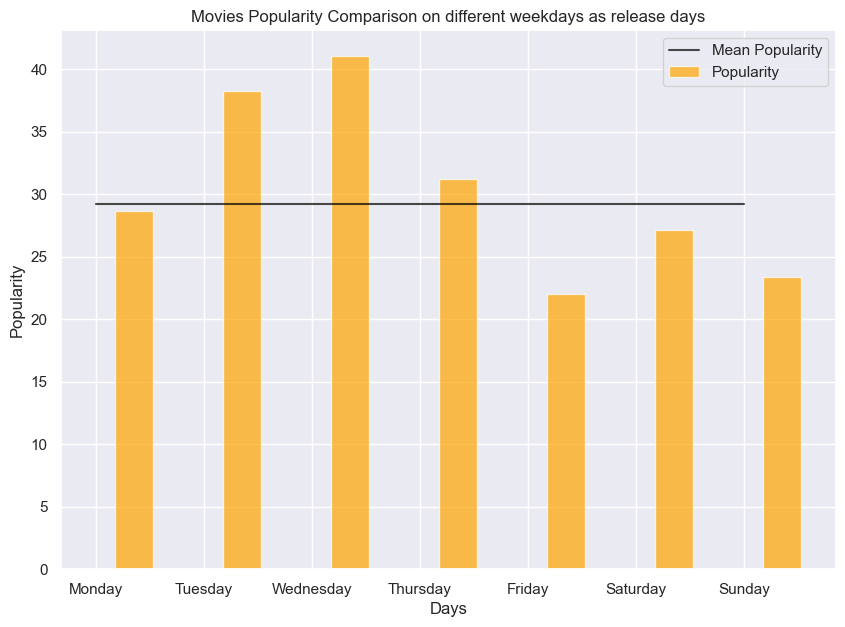

In [488]:
# Define the figure size
plt.figure(figsize=(10, 7))

# Plot the bars and the line
pop = plt.bar(ind+width, df2['popularity'], width, color = 'orange', alpha=.7, label='Popularity')
plt.plot(ind, np.repeat(pt_mean, 7), '-', color = 'black',  alpha=.7, label='Mean Popularity')

# Define labels, xticks and title
plt.ylabel('Popularity')
plt.xlabel('Days')
plt.title('Movies Popularity Comparison on different weekdays as release days')
plt.xticks(ind, df2.index)

# Define Legend
plt.legend()

1. Wednesday has the highest average profit i.e 108 Million Dollars for the movies released on that day.
2. Friday has the lowest average profit i.e. 49.9 Million Dollars for the movies released on that day.
3. Wednesday has the highest average popularity too i.e 32.69 units
4. Sunday has the lowest average popularity i.e. 14.35 units

 ## How the time duration has been affecting High Profits, High Voting Average and High Popularity over the years ?

In [489]:
movie_df.query('year >= 2007')['year'].value_counts()

2011    167
2010    162
2009    153
2013    150
2008    145
2012    137
2014    135
2007    124
2015    120
2016     72
Name: year, dtype: int64

<Axes: ylabel='year'>

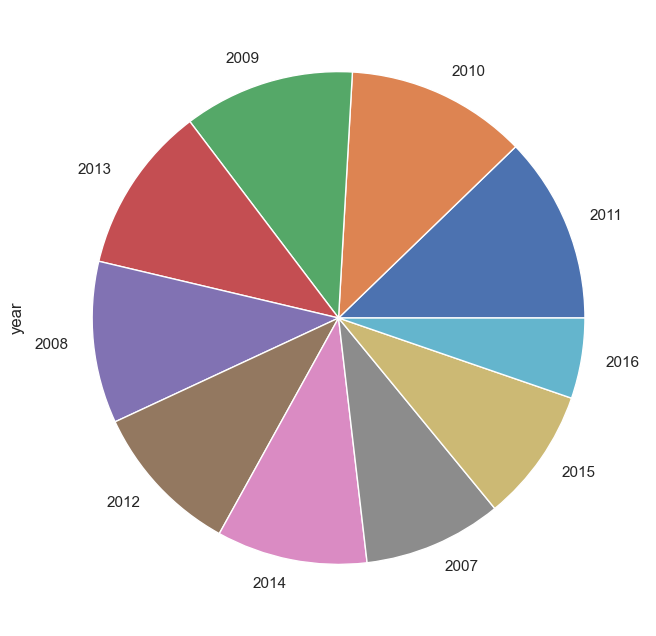

In [490]:
movie_df.query('year >= 2007')['year'].value_counts().plot(kind = 'pie', figsize = (8,8))

In [491]:
df3 = movie_df.query('year >= 2007')
df3['year'].value_counts()

2011    167
2010    162
2009    153
2013    150
2008    145
2012    137
2014    135
2007    124
2015    120
2016     72
Name: year, dtype: int64

In [492]:
df4 = df3.groupby('year')[['profit', 'popularity', 'vote_average']].mean()
df4

profit  popularity  vote_average
year                                        
2007  8.435828e+07   25.390923      6.342742
2008  7.649776e+07   28.153164      6.166207
2009  9.018310e+07   27.413036      6.257516
2010  7.919671e+07   27.235477      6.201852
2011  7.730514e+07   27.169902      6.137725
2012  1.216450e+08   35.457552      6.191241
2013  1.012083e+08   38.822408      6.350667
2014  1.261462e+08   61.606583      6.340741
2015  1.340412e+08   63.820730      6.311667
2016  1.369144e+08   51.806021      6.119444

In [493]:
# Calculate overall mean runtime
df3.runtime.mean()

108.94285714285714

In [494]:
df3.runtime.min()

41.0

In [495]:
df3.runtime.max()

338.0

* Set the ranges:

a. 0-100 for short movies

b. 100-220 for medium movies

c. Greater than 220 for long movies

In [496]:
# Form a dataset for short movies
df3_a = df3.query('runtime < 100').groupby('year')[['profit', 'popularity', 'vote_average']].mean()
df3_a
df3_a.loc[2017] = 0
df3_a

profit  popularity  vote_average
year                                        
2007  6.894512e+07   20.153460      5.819149
2008  7.679778e+07   23.227106      5.888462
2009  6.326808e+07   25.727978      6.045000
2010  7.029733e+07   25.014156      5.977551
2011  5.366548e+07   21.116826      5.878571
2012  7.380475e+07   27.631410      5.931667
2013  8.510122e+07   32.529389      5.848780
2014  9.396325e+07   39.039240      5.837500
2015  1.193019e+08   59.728594      5.840625
2016  1.205025e+08   39.259739      5.889474
2017  0.000000e+00    0.000000      0.000000

In [497]:
# Form a dataset for medium movies
df3_b= df3.query('(runtime >= 100) & (runtime <220)').groupby('year')[['profit', 'popularity', 'vote_average']].mean()
df3_b
df3_b.loc[2017] = 0

In [498]:
# Form a dataset for long movies
df3_c = df3.query('runtime >= 200').groupby('year')[['profit', 'popularity', 'vote_average']].mean()
df3_c
df3_c.loc[2007] = 0
df3_c.loc[2008] = 0
df3_c.loc[2009] = 0
df3_c.loc[2011] = 0
df3_c.loc[2012] = 0
df3_c.loc[2013] = 0
df3_c.loc[2014] = 0
df3_c.loc[2015] = 0
df3_c.loc[2016] = 0
df3_c.loc[2017] = 0
df3_c

profit  popularity  vote_average
year                                      
2010 -17128721.0    1.138383           6.7
2007         0.0    0.000000           0.0
2008         0.0    0.000000           0.0
2009         0.0    0.000000           0.0
2011         0.0    0.000000           0.0
2012         0.0    0.000000           0.0
2013         0.0    0.000000           0.0
2014         0.0    0.000000           0.0
2015         0.0    0.000000           0.0
2016         0.0    0.000000           0.0
2017         0.0    0.000000           0.0

In [499]:
sorter = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{2007: 0,
 2008: 1,
 2009: 2,
 2010: 3,
 2011: 4,
 2012: 5,
 2013: 6,
 2014: 7,
 2015: 8,
 2016: 9,
 2017: 10}

In [500]:
df3_c['year_id'] = df3_c.index
df3_c['year_id'] = df3_c['year_id'].map(sorterIndex)
df3_c

profit  popularity  vote_average  year_id
year                                               
2010 -17128721.0    1.138383           6.7        3
2007         0.0    0.000000           0.0        0
2008         0.0    0.000000           0.0        1
2009         0.0    0.000000           0.0        2
2011         0.0    0.000000           0.0        4
2012         0.0    0.000000           0.0        5
2013         0.0    0.000000           0.0        6
2014         0.0    0.000000           0.0        7
2015         0.0    0.000000           0.0        8
2016         0.0    0.000000           0.0        9
2017         0.0    0.000000           0.0       10

In [501]:
df3_c.sort_values('year_id', inplace=True)
df3_c

profit  popularity  vote_average  year_id
year                                               
2007         0.0    0.000000           0.0        0
2008         0.0    0.000000           0.0        1
2009         0.0    0.000000           0.0        2
2010 -17128721.0    1.138383           6.7        3
2011         0.0    0.000000           0.0        4
2012         0.0    0.000000           0.0        5
2013         0.0    0.000000           0.0        6
2014         0.0    0.000000           0.0        7
2015         0.0    0.000000           0.0        8
2016         0.0    0.000000           0.0        9
2017         0.0    0.000000           0.0       10

In [502]:
ind2 = np.arange(len(df3_c['year_id']))
width = 0.35
ind2 + 2*width

array([ 0.7,  1.7,  2.7,  3.7,  4.7,  5.7,  6.7,  7.7,  8.7,  9.7, 10.7])

### profit comparisons with runtime

In [503]:
# Set the figure size
plt.figure(figsize=(18, 9))

# Plot the bars and the line
pro1 = plt.bar(ind2, df3_a['profit'], width, color = 'red', alpha=.7, label='Profit - Short Film')
pro2 = plt.bar(ind2 + width, df3_b['profit'], width, color = 'grey', alpha=.7, label='Profit - Medium Film')
pro3 = plt.bar(ind2 + 2*width, df3_c['profit'], width, color = 'orange', alpha=.7, label='Profit - Long Film')
plt.plot(ind2 + width, np.repeat(pf_mean, 11), '-', color = 'black',  alpha=.7, label='Mean Profit')

# Plot the labels, xticks and title
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Duration Wise Movies Profit Comparison from 2007 - 2017')
plt.xticks(ind2 + width, df3_c.index)

# set the legend
plt.legend()

1. Maximum profit on an average is attained by medium films in 2012.
2. Generally medium films have gained more profits than other category films over the years.
3. Long films have given loss on an average in 2010.
4. Over the years, medium films have gained average profits more than overall profit mean except 2010 and 2017
5. Short films have shown increasing average profit trends over the years with 2015 and 2016 being the years crossing overall profit mean
6. Long films data is not present for 2011 - 2015 and 2017 means there were no long films in those years
7. Short films data is not present for 2017 there were no short films for that year

## popularity comparisons with runtime

In [504]:
# Set the figure size
plt.figure(figsize=(18, 9))

# Plot the bars and the line
pop1 = plt.bar(ind2, df3_a['popularity'], width, color = 'red', alpha=.7, label='Popularity - Short Film')
pop2 = plt.bar(ind2 + width, df3_b['popularity'], width, color = 'grey', alpha=.7, label='Popularity - Medium Film')
pop3 = plt.bar(ind2 + 2*width, df3_c['popularity'], width, color = 'orange', alpha=.7, label='Popularity - Long Film')
plt.plot(ind2 + width, np.repeat(pt_mean, 11), '-', color = 'black',  alpha=.7, label='Mean Popularity')

# Plot the labels, xticks and title
plt.ylabel('Popularity')
plt.xlabel('Year')
plt.title('Duration Wise Movies Popularity Comparison from 2007 - 2017')
plt.xticks(ind2 + width, df3_c.index)

# Set the legend
plt.legend()

1. Maximum popularity on an average is attained by medium films in 2014.
2. Generally medium films have gained more popularity than other category films and have shown increasing average popularity trends over the years.
3. Long films have been lowest in terms of popularity over the years.
4. Over all the years, medium films have gained average popularity more than overall popularity mean
5. Short films have shown increasing average popularity trends over the years with 2015 and 2016 being the years crossing overall popularity mean
6. Long films data is not present for 2011 - 2015 and 2017 means there were no long films in those years
7. Short films data is not present for 2017 there were no short films for that year

### vote average comparisons with runtime

In [505]:
# Calculate overall mean of vote averages
vt_mean = movie_df.vote_average.mean()
vt_mean

6.313497506234413

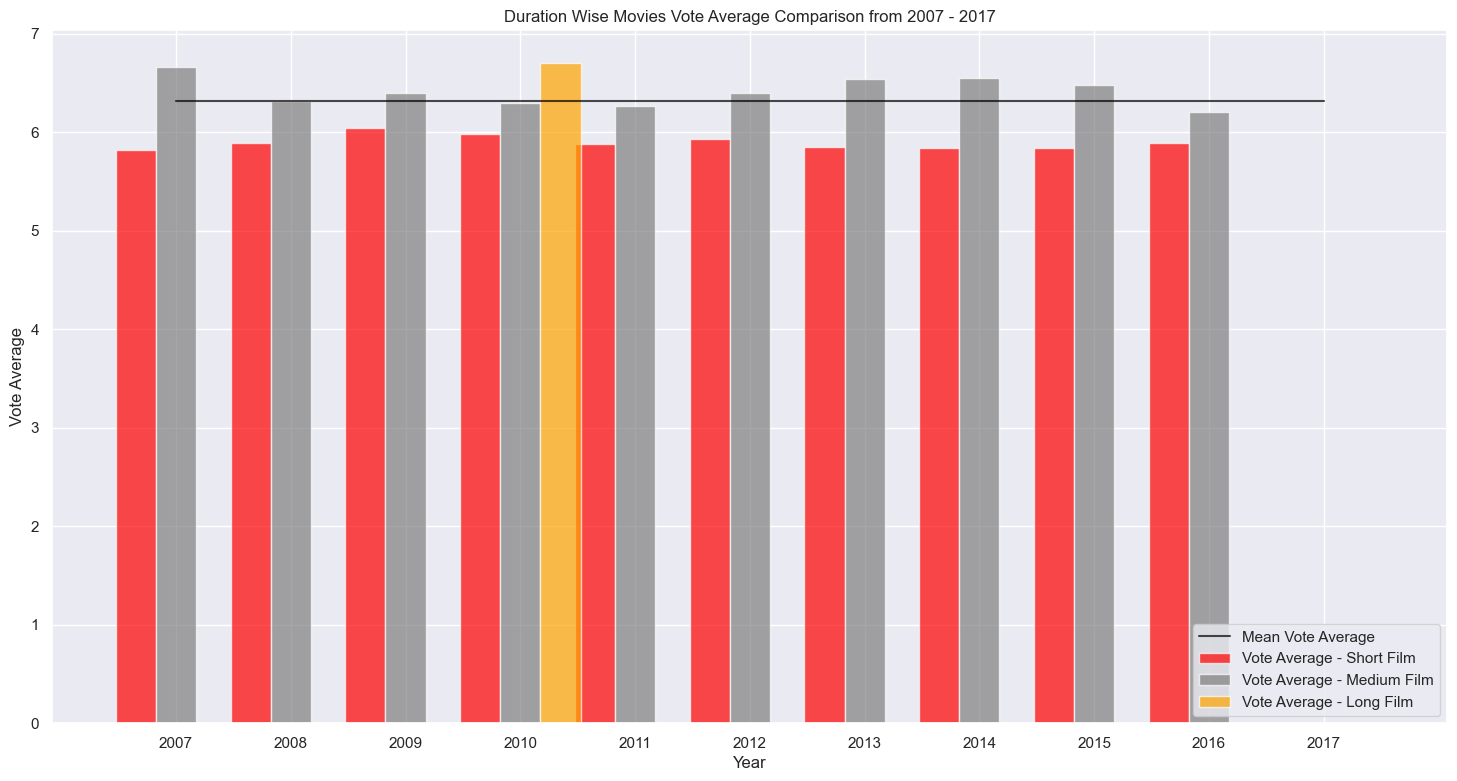

In [506]:
# Set the figure size
plt.figure(figsize=(18, 9))

# Plot the bars and the line
vot1 = plt.bar(ind2, df3_a['vote_average'], width, color = 'red', alpha=.7, label='Vote Average - Short Film')
vot2 = plt.bar(ind2 + width, df3_b['vote_average'], width, color = 'grey', alpha=.7, label='Vote Average - Medium Film')
vot3 = plt.bar(ind2 + 2*width, df3_c['vote_average'], width, color = 'orange', alpha=.7, label='Vote Average - Long Film')
plt.plot(ind2 + width, np.repeat(vt_mean, 11), '-', color = 'black',  alpha=.7, label='Mean Vote Average')

# Plot the labels, xticks and title
plt.ylabel('Vote Average')
plt.xlabel('Year')
plt.title('Duration Wise Movies Vote Average Comparison from 2007 - 2017')
plt.xticks(ind2 + width, df3_c.index)

# Set the legend
plt.legend()

1. Maximum vote rating on an average is attained by long films in 2009 followed by medium films in 2017.
2. Long films data is not present for 2011 - 2015 and 2017 means there were no long films in those years
3. Short films data is not present for 2017 there were no short films for that year 
4. Short films have always been below overall mean vote rating on an average for all the years

### Movies budget

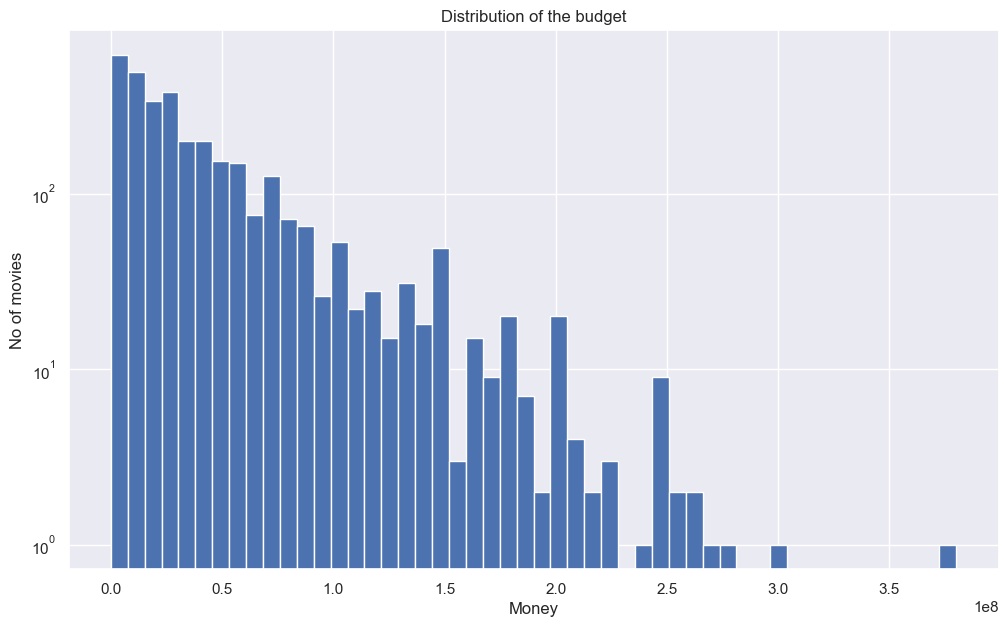

In [507]:
plt.figure(figsize=(12,7))
plt.hist(movie_df['budget'],bins= 50)
plt.title("Distribution of the budget")
plt.xlabel('Money')
plt.ylabel('No of movies')
plt.yscale("log")
plt.show()

### Revenue

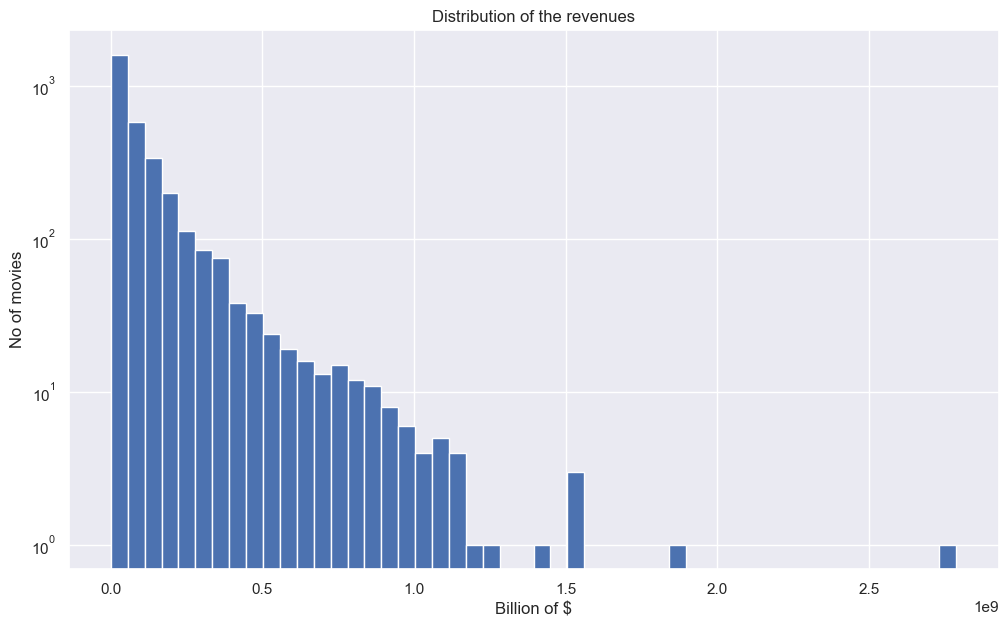

In [508]:
plt.figure(figsize=(12,7))
plt.hist(movie_df['revenue'], bins= 50)
plt.title("Distribution of the revenues")
plt.xlabel('Billion of $')
plt.ylabel('No of movies')
plt.yscale("log")
plt.show()

## Revenue And Budget

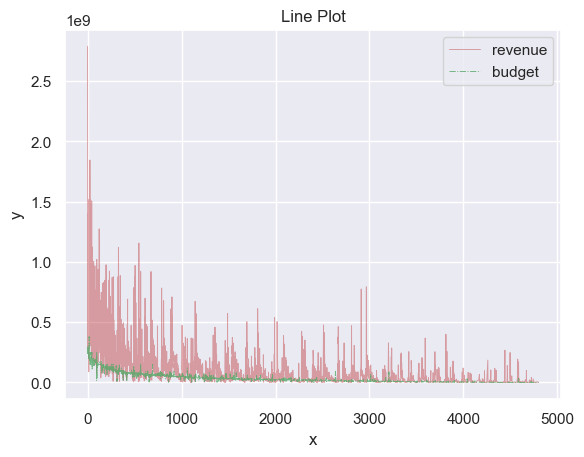

In [509]:
# Line plot
movie_df.revenue.plot(kind='line', color='r', label='revenue', linewidth=.7, alpha=.5, grid=True, linestyle='-' )
movie_df.budget.plot(color='g', label='budget', linewidth=.7, alpha=.8, grid=True, linestyle='-.')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Plot')
plt.show()

## Profit And Budget

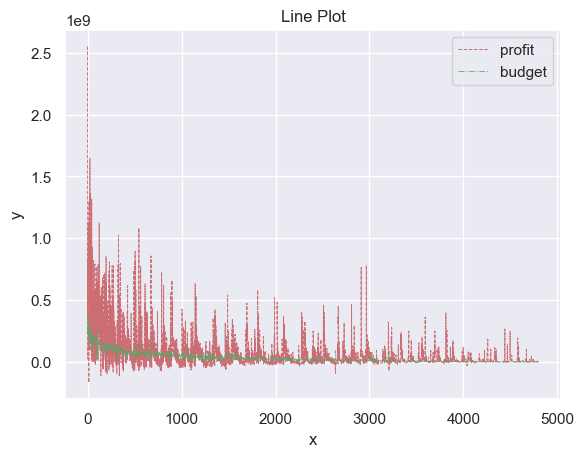

In [510]:
movie_df.profit.plot(color='r', label='profit', linewidth=.7, alpha=.8, grid=True, linestyle='--')
movie_df.budget.plot(color='g', label='budget', linewidth=.7, alpha=.8, grid=True, linestyle='-.')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Plot')
plt.show()


### Genres

In [511]:
df_genres = movie_df.explode('genres')
df_genres.head()

budget           genres                                      homepage  \
0  237000000           Action                   http://www.avatarmovie.com/   
0  237000000        Adventure                   http://www.avatarmovie.com/   
0  237000000          Fantasy                   http://www.avatarmovie.com/   
0  237000000  Science Fiction                   http://www.avatarmovie.com/   
1  300000000        Adventure  http://disney.go.com/disneypictures/pirates/   

      id                                           keywords original_language  \
0  19995  [culture clash, future, space war, space colon...                en   
0  19995  [culture clash, future, space war, space colon...                en   
0  19995  [culture clash, future, space war, space colon...                en   
0  19995  [culture clash, future, space war, space colon...                en   
1    285  [ocean, drug abuse, exotic island, east india ...                en   

                             original_title  \
0                                    Avatar   
0                                    Avatar   
0                                    Avatar   
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies  ...  \
0  [Ingenious Film Partners, Twentieth Century Fo...  ...   
0  [Ingenious Film Partners, Twentieth Century Fo...  ...   
0  [Ingenious Film Partners, Twentieth Century Fo...  ...   
0  [Ingenious Film Partners, Twentieth Century Fo...  ...   
1  [Walt Disney Pictures, Jerry Bruckheimer Films...  ...   

                                          tagline  \
0                     Enter the World of Pandora.   
0                     Enter the World of Pandora.   
0                     Enter the World of Pandora.   
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
0                                    Avatar           7.2       11800   
0                                    Avatar           7.2       11800   
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   

       profit  year day_of_year month  date       day  
0  2550965087  2009         344    12    10  Thursday  
0  2550965087  2009         344    12    10  Thursday  
0  2550965087  2009         344    12    10  Thursday  
0  2550965087  2009         344    12    10  Thursday  
1   661000000  2007         139     5    19  Saturday  

[5 rows x 26 columns]

In [512]:
df_genres.genres.unique()

array(['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime',
       'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
       'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
       'Documentary', 'Foreign', nan], dtype=object)

In [513]:
count_genres = df_genres.groupby('genres').count()[['id']].sort_values(by='id', ascending=False)
count_genres.head()

id
genres         
Drama      1427
Comedy     1101
Thriller    929
Action      915
Adventure   660

* Drama has highest no of movies

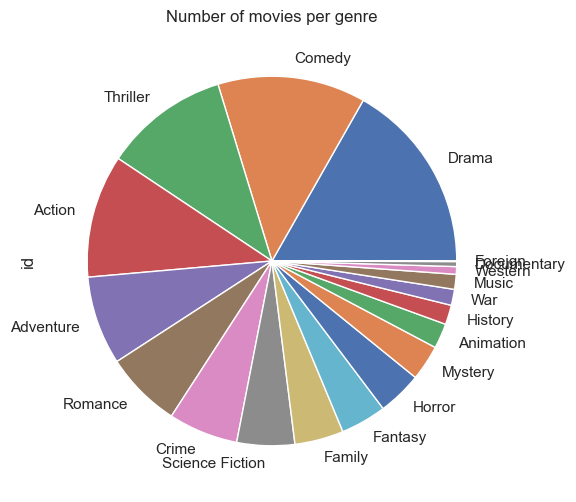

In [514]:
count_genres.plot(kind ='pie',figsize=(10,6),legend = False, subplots = True)
plt.title('Number of movies per genre')
plt.show()

### Genre that make the most money

In [515]:
df_genres_revenue = movie_df[['genres','revenue']].explode('genres')
df_genres_revenue.head()

genres     revenue
0           Action  2787965087
0        Adventure  2787965087
0          Fantasy  2787965087
0  Science Fiction  2787965087
1        Adventure   961000000

* Action generate highest revenue

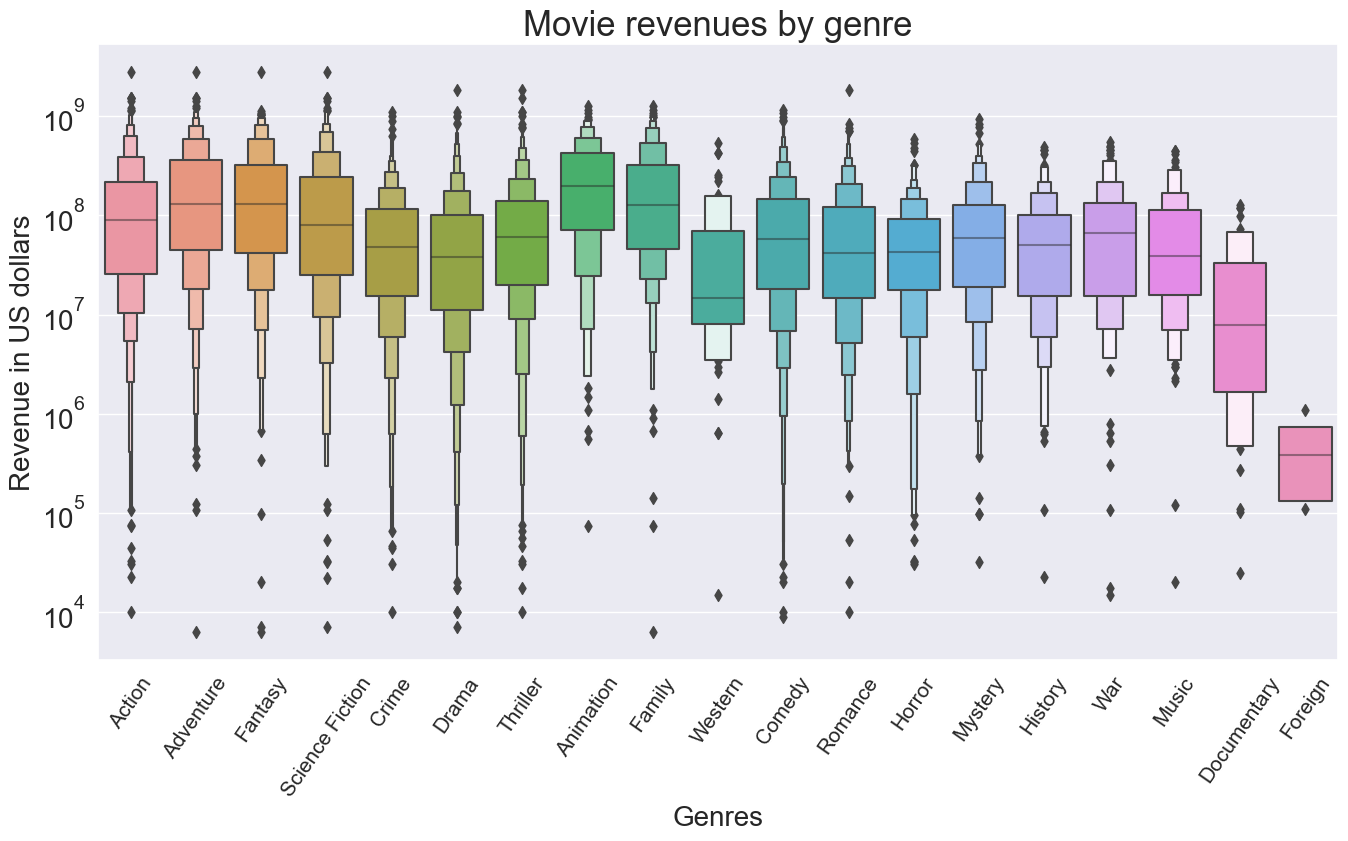

In [516]:
sns.set(style="darkgrid")
f,ax=plt.subplots(figsize=(16, 8))
sns.boxenplot(data=df_genres_revenue[df_genres_revenue["revenue"]>0].reset_index(),x="genres",y="revenue")
plt.yticks(fontsize=20)
plt.yscale("log")
plt.xticks(rotation=55,fontsize=15)
plt.xlabel("Genres",fontsize=20)
plt.ylabel("Revenue in US dollars",fontsize=20)
plt.title("Movie revenues by genre",fontsize=25)
plt.show()

In [517]:
df_genres_revenue = df_genres_revenue.groupby('genres')[['revenue']].sum()
df_genres_revenue.head()

revenue
genres                 
Action     162316088206
Adventure  163667924225
Animation   52436463168
Comedy     120403594524
Crime       45797218000

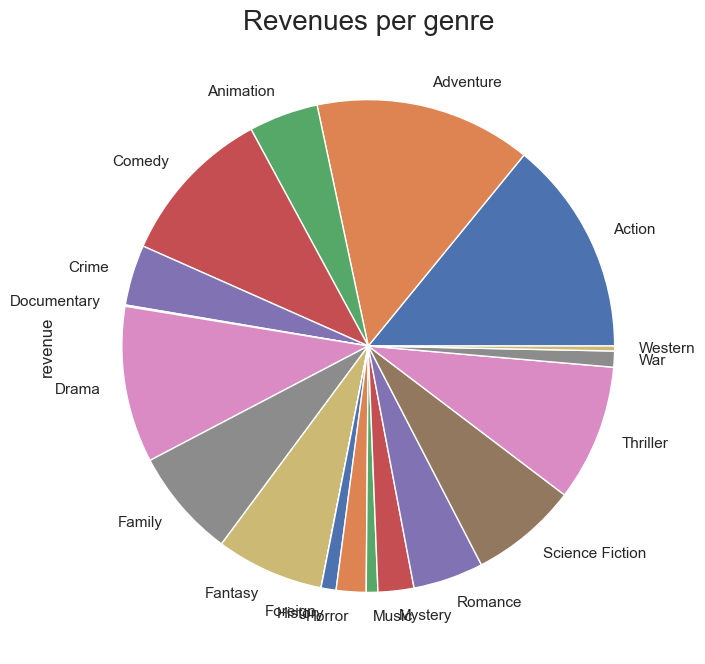

In [518]:

df_genres_revenue.plot(kind ='pie',figsize=(16,8),legend = False, subplots = True)
plt.title('Revenues per genre',fontsize=20)
plt.show()

### Vote Average

In [519]:
df_genres_grade = movie_df[['genres','vote_average']].explode('genres')
df_genres_grade.head()

genres  vote_average
0           Action           7.2
0        Adventure           7.2
0          Fantasy           7.2
0  Science Fiction           7.2
1        Adventure           6.9

* Action, Adventure, Fantasy have highest voting

In [520]:
df_genres_grade.shape

(8507, 2)

In [521]:
sns.set(style="darkgrid")
f,ax=plt.subplots(figsize=(16, 8))
sns.boxenplot(data=df_genres_grade,x="genres",y="vote_average")
plt.yticks(fontsize=20)
plt.xticks(rotation=55,fontsize=15)
plt.xlabel("Genres",fontsize=20)
plt.ylabel("Score",fontsize=20)
plt.title("Movie scores by genre",fontsize=25)
plt.show()

### Popularity 

Metric computed by TMDB and taking into account : 

* Number of votes for the day
* Number of views for the day
* Number of users who marked it as a "favourite" for the day
* Number of users who added it to their "watchlist" for the day
* Release date
* Number of total votes
* Previous days score

In [522]:
df_movie_pop = movie_df[['title','popularity']].sort_values(by='popularity', ascending=False)
df_movie_pop.head()

title  popularity
546                  Minions  875.581305
95              Interstellar  724.247784
788                 Deadpool  514.569956
94   Guardians of the Galaxy  481.098624
127       Mad Max: Fury Road  434.278564

### Revenue Timeline

In [523]:
df_movie_revenue = movie_df[['title','revenue','release_date']].set_index('release_date').sort_values(by='revenue', ascending=False)
df_movie_revenue.head()

title     revenue
release_date                            
2009-12-10            Avatar  2787965087
1997-11-18           Titanic  1845034188
2012-04-25      The Avengers  1519557910
2015-06-09    Jurassic World  1513528810
2015-04-01         Furious 7  1506249360

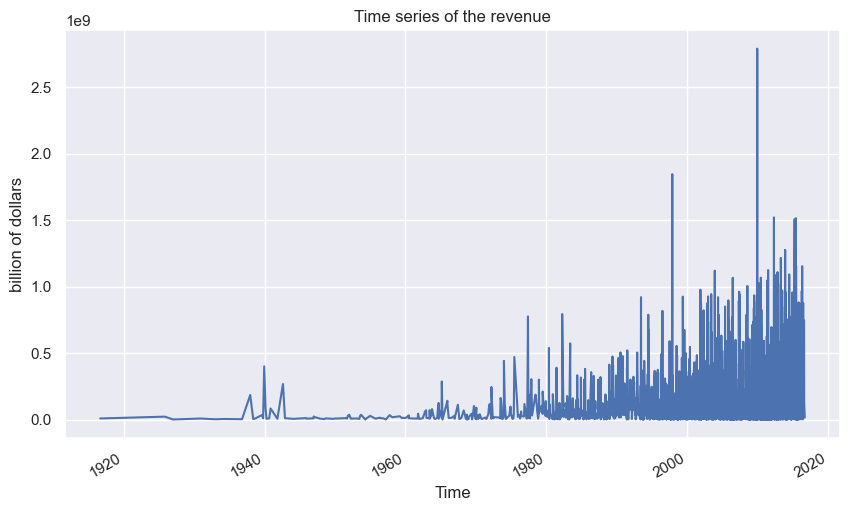

In [524]:
df_movie_revenue.plot(figsize=(10,6),legend = False)
plt.title('Time series of the revenue')
plt.xlabel("Time")
plt.ylabel("billion of dollars")
plt.show()

In [525]:
df_genres_revenue_year = movie_df[['genres','revenue','year']].explode('genres').groupby(['genres','year']).sum()
df_genres_revenue_year.head()

revenue
genres year          
Action 1930   8000000
       1936   2736000
       1949   7800000
       1950   8000000
       1952  36000000

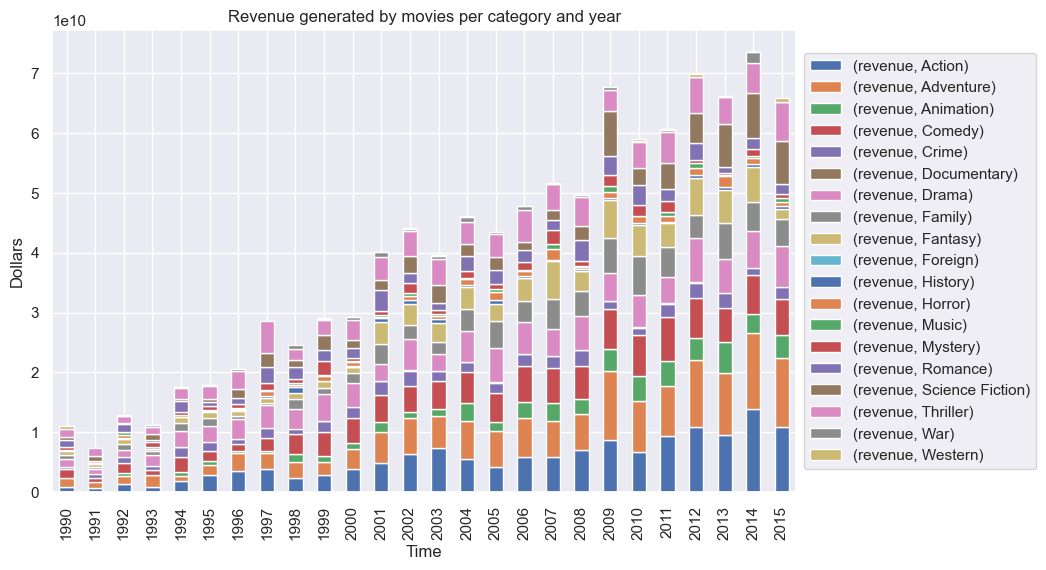

In [526]:
fig = plt.figure()
ax = plt.subplot(111)

starting_year = 1990
df_genres_revenue_year = movie_df[['genres','revenue','year']].explode('genres').groupby(['genres','year']).sum()
df_genres_revenue_year.unstack(level=0).fillna(0).loc[starting_year:2015].plot(kind = 'bar',stacked=True, ax=ax, figsize=(12,6),legend  = True)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Revenue generated by movies per category and year')
plt.ylabel('Dollars')
plt.xlabel('Time')
plt.show()

In [527]:
#Statistical Summary
movie_df.year.describe()

count    3208.000000
mean     2001.719140
std        13.199153
min      1916.000000
25%      1998.000000
50%      2005.000000
75%      2010.000000
max      2016.000000
Name: year, dtype: float64

In [528]:
movie_df["budget_adjusted"]=movie_df.apply(lambda x: cpi.inflate(x["budget"],x["year"],to=2016),axis=1)
movie_df["revenue_adjusted"]=movie_df.apply(lambda x: cpi.inflate(x["revenue"],x["year"],to=2016),axis=1)

In [529]:
df_movie_revenue_adjusted = movie_df[['title','revenue_adjusted','release_date']].set_index('release_date').sort_values(by='revenue_adjusted', ascending=False)
df_movie_revenue_adjusted.head()

title  revenue_adjusted
release_date                                                   
1939-12-15                 Gone with the Wind      6.909723e+09
1942-08-14                              Bambi      3.937987e+09
2009-12-10                             Avatar      3.118954e+09
1937-12-20    Snow White and the Seven Dwarfs      3.082181e+09
1977-05-25                          Star Wars      3.070973e+09

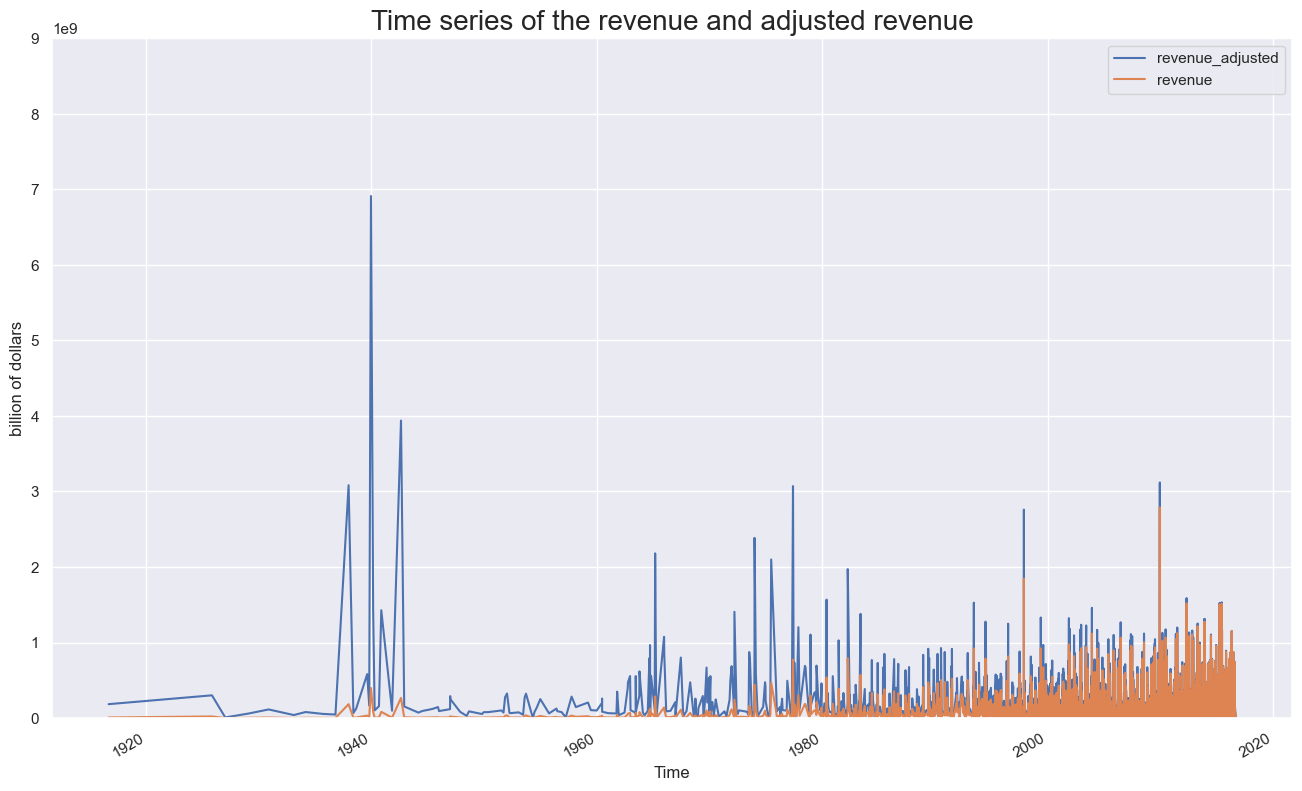

In [530]:
df_movie_revenue_adjusted.reset_index(
    ).merge(df_movie_revenue,how="inner").set_index("release_date").sort_index().drop(columns=["title"]).plot(figsize=(16,10))
plt.title('Time series of the revenue and adjusted revenue',fontsize=20)
plt.xlabel("Time")
plt.ylabel("billion of dollars")
plt.ylim(0,9e9)
i=0
for index , row in df_movie_revenue_adjusted[:11].iterrows():
    i+=1
    y=row["revenue_adjusted"]
    #plt.annotate(s=str(i)+". "+row["title"],xy=(index,y),rotation=65,xytext=(index,y+10000000))
plt.show()

**Movies below the line recorded a loss**

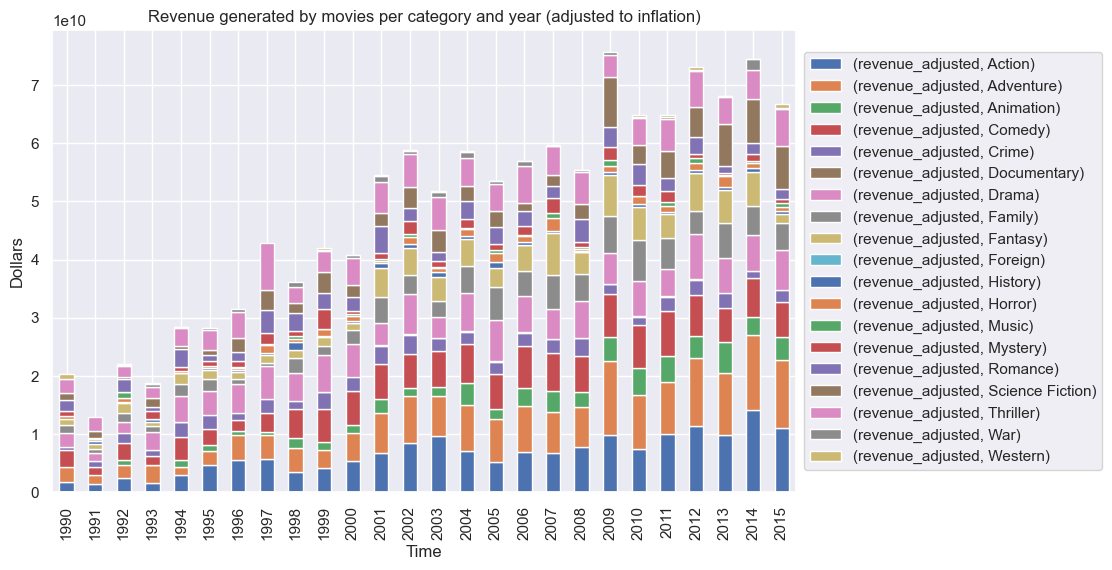

In [531]:
fig = plt.figure()
ax = plt.subplot(111)

starting_year = 1990
df_genres_revenue_year = movie_df[['genres','revenue_adjusted','year']].explode('genres').groupby(['genres','year']).sum()
df_genres_revenue_year.unstack(level=0).fillna(0).loc[starting_year:2015].plot(kind = 'bar',stacked=True, ax=ax, figsize=(12,6),legend  = True)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Revenue generated by movies per category and year (adjusted to inflation)')
plt.ylabel('Dollars')
plt.xlabel('Time')
plt.show()

#### Revenue and vote average

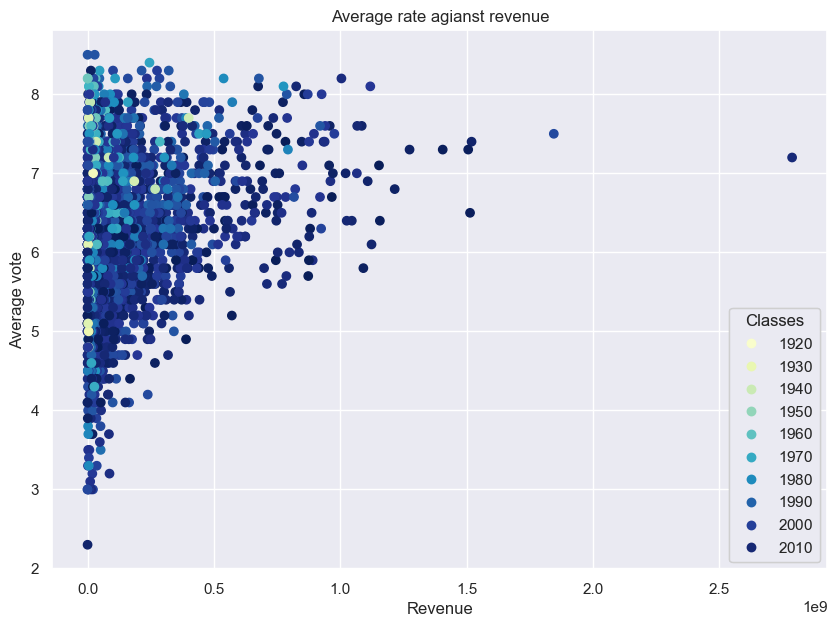

In [532]:
fig, ax = plt.subplots(figsize=(10,7))
scatter = ax.scatter( movie_df['revenue'],movie_df['vote_average'], c =movie_df['year'],cmap='YlGnBu', marker  ='o')


legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)

plt.title('Average rate agianst revenue')
plt.xlabel('Revenue')
plt.ylabel('Average vote')
plt.show()

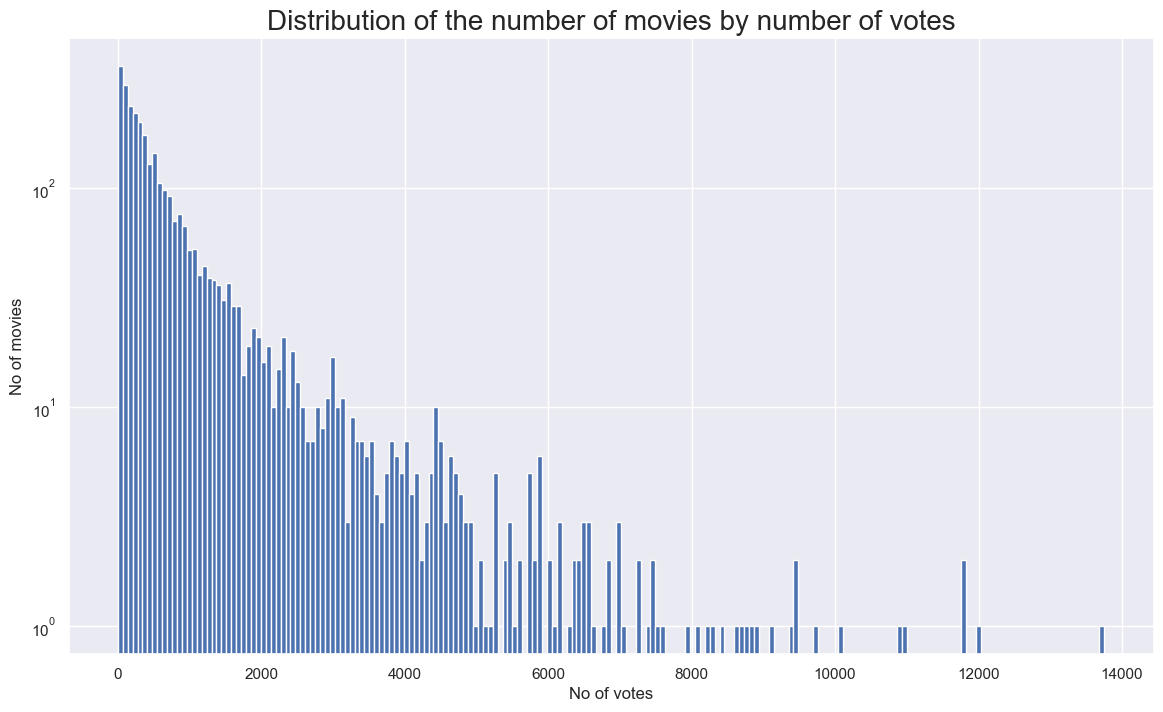

In [533]:
plt.figure(figsize=(14,8))
plt.hist(movie_df['vote_count'],200)
plt.title('Distribution of the number of movies by number of votes',fontsize=20)
plt.xlabel('No of votes')
plt.ylabel('No of movies')
plt.yscale("log")
plt.show()

### Production companies

In [534]:
df_movie_prod = movie_df[['production_companies','id']].explode('production_companies')
df_movie_prod = df_movie_prod.groupby('production_companies').count().sort_values(by='id', ascending=False)
df_movie_prod.columns=["count"]
df_movie_prod

count
production_companies                         
Warner Bros.                              280
Universal Pictures                        272
Paramount Pictures                        242
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         167
...                                       ...
Hit & Run Productions                       1
Hobby Films                                 1
Hokkaido Broadcasting Co.                   1
Holleran Company                            1
Österreichischer Rundfunk (ORF)             1

[3539 rows x 1 columns]

*  Warner Bros has released highest no of movies.

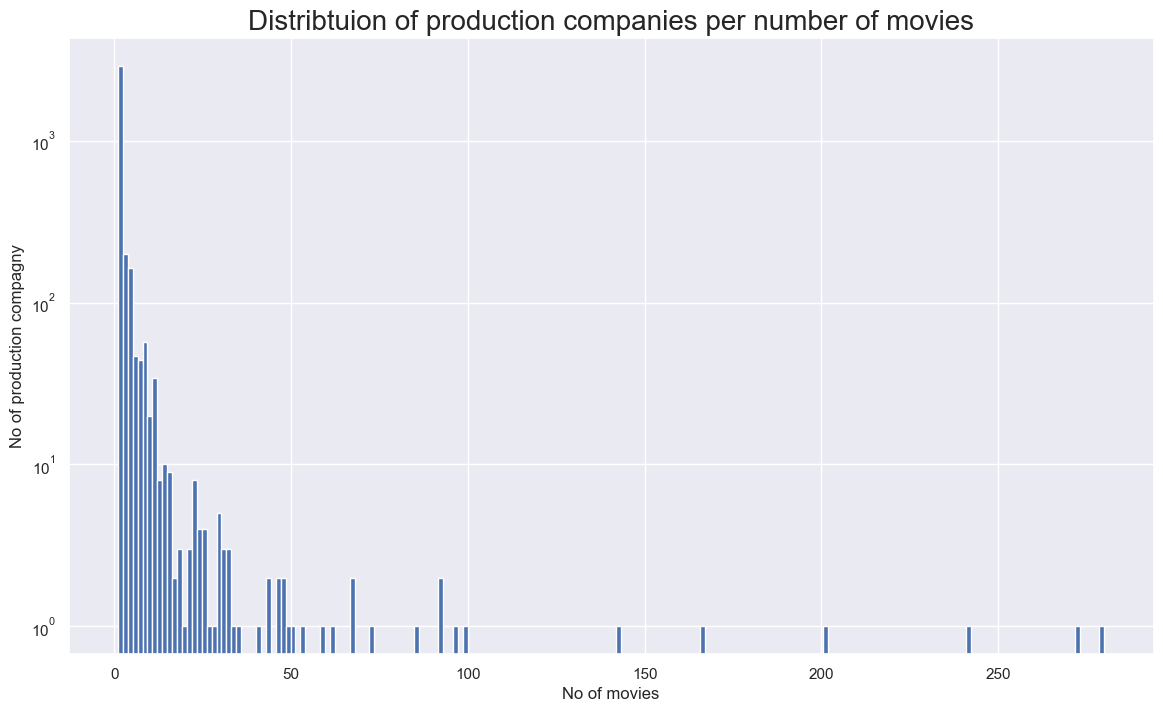

In [535]:

plt.figure(figsize=(14,8))
plt.hist(df_movie_prod['count'],200)
plt.title('Distribtuion of production companies per number of movies',fontsize=20)
plt.ylabel('No of production compagny')
plt.xlabel('No of movies')
plt.yscale("log")
plt.show()

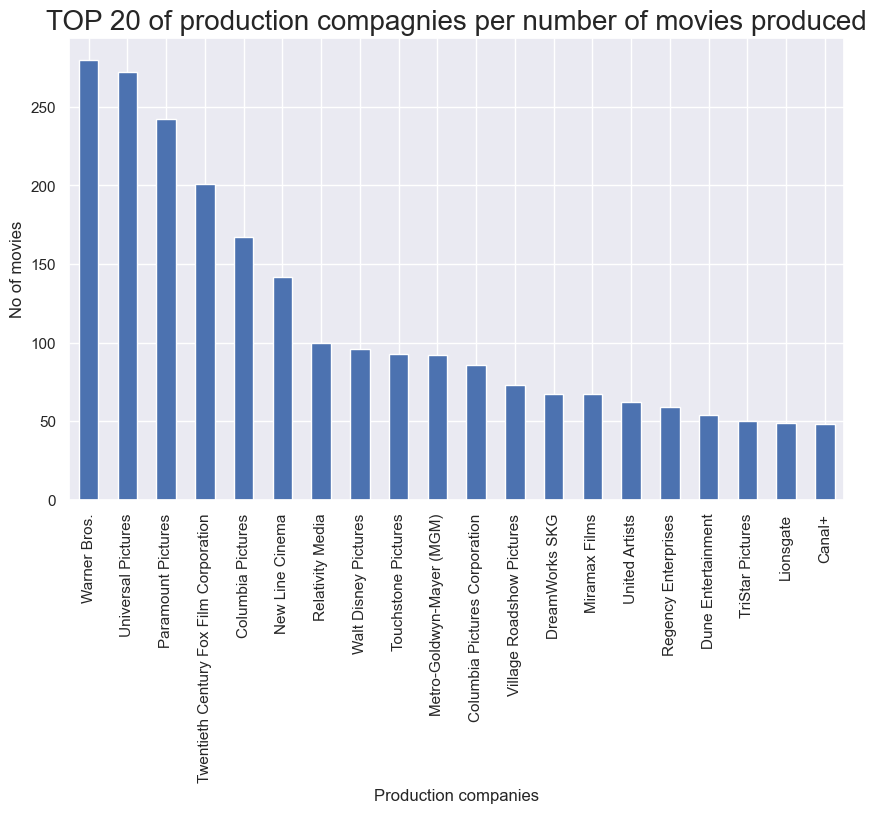

In [536]:
df_movie_prod[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('TOP 20 of production compagnies per number of movies produced',fontsize=20)
plt.xlabel("Production companies")
plt.ylabel("No of movies")
plt.show()

In [537]:
df_movie_revenue = movie_df[['production_companies','revenue']].explode('production_companies')

In [538]:
df_movie_revenue_sum = df_movie_revenue.groupby('production_companies').sum().sort_values(by='revenue', ascending=False)
df_movie_revenue_sum.head()

revenue
production_companies                               
Warner Bros.                            48822074563
Universal Pictures                      42394603321
Paramount Pictures                      40514725671
Twentieth Century Fox Film Corporation  39136501776
Columbia Pictures                       28526534603

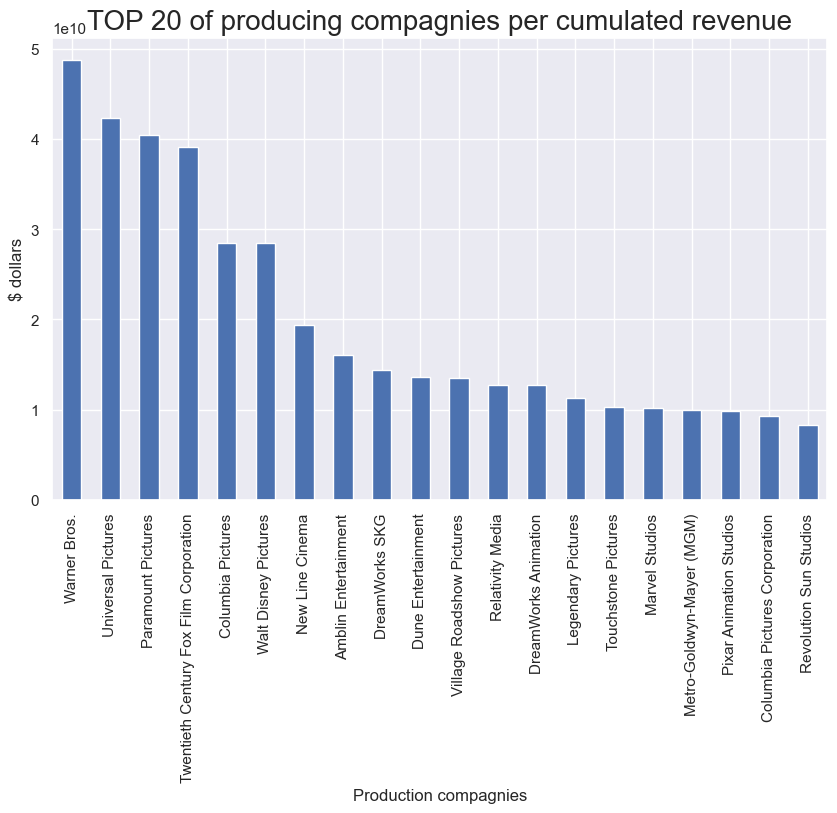

In [539]:
df_movie_revenue_sum[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('TOP 20 of producing compagnies per cumulated revenue',fontsize=20)
plt.xlabel("Production compagnies")
plt.ylabel("$ dollars")
plt.show()

In [540]:
df_movie_revenue_avg = df_movie_revenue.groupby('production_companies').mean().sort_values(by='revenue', ascending=False)
df_movie_revenue_avg.head()

revenue
production_companies                                     
Québec Production Services Tax Credit        1.506249e+09
Abu Dhabi Film Commission                    1.506249e+09
Colorado Office of Film, Television & Media  1.506249e+09
Prime Focus                                  1.405404e+09
Vita-Ray Dutch Productions (III)             1.153304e+09

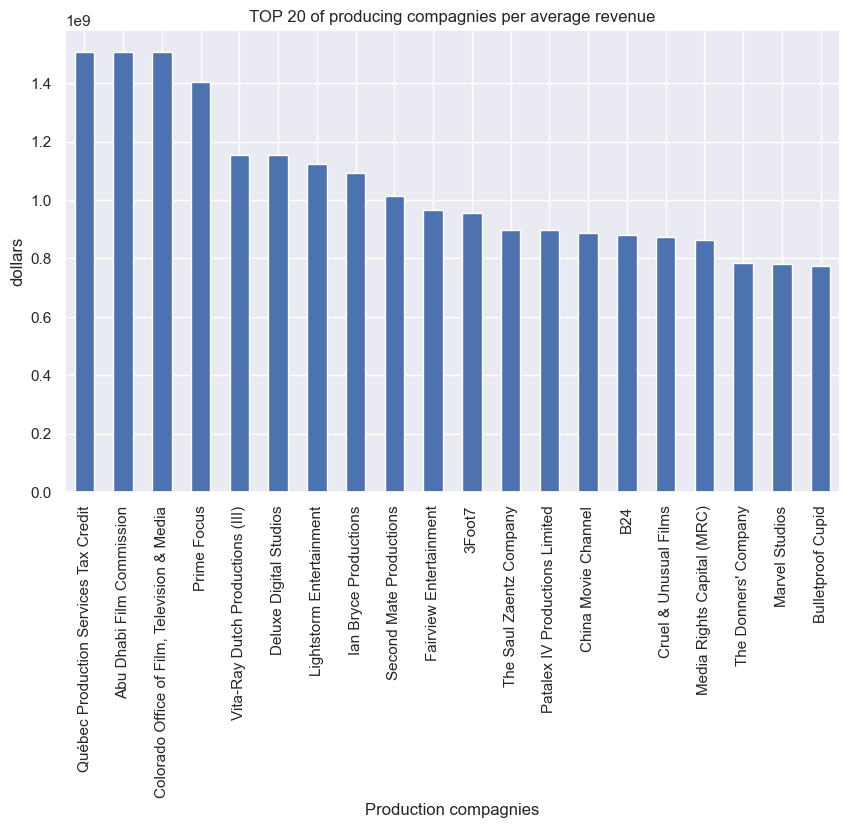

In [541]:
df_movie_revenue_avg[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('TOP 20 of producing compagnies per average revenue')
plt.xlabel("Production compagnies")
plt.ylabel("dollars")
plt.show()

### keeping the most important companies as it's a categorical features

In [542]:
interesting_prod = df_movie_prod.head(20).index.values
movie_df.production_companies = movie_df.production_companies.apply(lambda x :[prod for prod in x if prod in interesting_prod])
movie_df.head()


budget                                         genres  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]   
1  300000000                   [Adventure, Fantasy, Action]   
2  245000000                     [Action, Adventure, Crime]   
3  250000000               [Action, Crime, Drama, Thriller]   
4  260000000           [Action, Adventure, Science Fiction]   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [culture clash, future, space war, space colon...                en   
1  [ocean, drug abuse, exotic island, east india ...                en   
2  [spy, based on novel, secret agent, sequel, mi...                en   
3  [dc comics, crime fighter, terrorist, secret i...                en   
4  [based on novel, mars, medallion, space travel...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... vote_average  \
0  [Twentieth Century Fox Film Corporation, Dune ...  ...          7.2   
1                             [Walt Disney Pictures]  ...          6.9   
2                                [Columbia Pictures]  ...          6.3   
3                                     [Warner Bros.]  ...          7.6   
4                             [Walt Disney Pictures]  ...          6.1   

  vote_count      profit  year day_of_year month date        day  \
0      11800  2550965087  2009         344    12   10   Thursday   
1       4500   661000000  2007         139     5   19   Saturday   
2       4466   635674609  2015         299    10   26     Monday   
3       9106   834939099  2012         198     7   16     Monday   
4       2124    24139100  2012          67     3    7  Wednesday   

   budget_adjusted  revenue_adjusted  
0     2.651368e+08      3.118954e+09  
1     3.472625e+08      1.112398e+09  
2     2.480907e+08      8.917844e+08  
3     2.613385e+08      1.134145e+09  
4     2.717920e+08      2.970259e+08  

[5 rows x 28 columns]

## Insights

1. Most movies lie in the budget range 0 to 0.5 on a e to the power 8 scale
2. Most movies were made in the months of January and December
3. Most movies have popularity between 0 to 100 
4. Many movies have negative profit values which suggests loss making movies
5. Most movies have revenue collection in the range 0 to 0.25 but on a e to the power of 9 scale
6. Most movies have runtime in the range of 75 to 150 
7. Vote average has a bit scattered distribution than other variables with most movies lying in the range of 6-7 voting average
8. Most movies have been released between the years 2000 and 2015

### Actors 

In [543]:
credits_df.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...   
1  [[Johnny Depp, 2], [Orlando Bloom, 2], [Keira ...   
2  [[Daniel Craig, 2], [Christoph Waltz, 2], [Léa...   
3  [[Christian Bale, 2], [Michael Caine, 2], [Gar...   
4  [[Taylor Kitsch, 2], [Lynn Collins, 1], [Saman...   

                                                crew  
0  [[Stephen E. Rivkin, Editor, Editing, 0], [Ric...  
1  [[Dariusz Wolski, Director of Photography, Cam...  
2  [[Thomas Newman, Original Music Composer, Soun...  
3  [[Hans Zimmer, Original Music Composer, Sound,...  
4  [[Andrew Stanton, Screenplay, Writing, 2], [An...

In [544]:
df_actors = credits_df.set_index('title').cast.apply(pd.Series).stack().reset_index(level= 0).rename(columns={0:'cast'})
df_actors.head()

C:\Users\shromana\AppData\Local\Temp\ipykernel_11936\115990984.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_actors = credits_df.set_index('title').cast.apply(pd.Series).stack().reset_index(level= 0).rename(columns={0:'cast'})


title                     cast
0  Avatar     [Sam Worthington, 2]
1  Avatar         [Zoe Saldana, 1]
2  Avatar    [Sigourney Weaver, 1]
3  Avatar        [Stephen Lang, 2]
4  Avatar  [Michelle Rodriguez, 1]

In [545]:
df_actors['actor'] = df_actors['cast'].map(lambda x: x[0])
df_actors['actor_gender']  = df_actors['cast'].map(lambda x: x[1])
df_actors.drop(columns = 'cast',inplace = True)
df_actors.head()

title               actor  actor_gender
0  Avatar     Sam Worthington             2
1  Avatar         Zoe Saldana             1
2  Avatar    Sigourney Weaver             1
3  Avatar        Stephen Lang             2
4  Avatar  Michelle Rodriguez             1

In [546]:
df_actors.actor.nunique()

54201

### Drop Missing Values

In [547]:
df_actor_movie = df_actors.merge(movie_df, on='title', how='left').dropna()
df_actor_movie.head()

title               actor  actor_gender       budget  \
0  Avatar     Sam Worthington             2  237000000.0   
1  Avatar         Zoe Saldana             1  237000000.0   
2  Avatar    Sigourney Weaver             1  237000000.0   
3  Avatar        Stephen Lang             2  237000000.0   
4  Avatar  Michelle Rodriguez             1  237000000.0   

                                          genres                     homepage  \
0  [Action, Adventure, Fantasy, Science Fiction]  http://www.avatarmovie.com/   
1  [Action, Adventure, Fantasy, Science Fiction]  http://www.avatarmovie.com/   
2  [Action, Adventure, Fantasy, Science Fiction]  http://www.avatarmovie.com/   
3  [Action, Adventure, Fantasy, Science Fiction]  http://www.avatarmovie.com/   
4  [Action, Adventure, Fantasy, Science Fiction]  http://www.avatarmovie.com/   

        id                                           keywords  \
0  19995.0  [culture clash, future, space war, space colon...   
1  19995.0  [culture clash, future, space war, space colon...   
2  19995.0  [culture clash, future, space war, space colon...   
3  19995.0  [culture clash, future, space war, space colon...   
4  19995.0  [culture clash, future, space war, space colon...   

  original_language original_title  ... vote_average  vote_count  \
0                en         Avatar  ...          7.2     11800.0   
1                en         Avatar  ...          7.2     11800.0   
2                en         Avatar  ...          7.2     11800.0   
3                en         Avatar  ...          7.2     11800.0   
4                en         Avatar  ...          7.2     11800.0   

         profit    year day_of_year  month  date       day budget_adjusted  \
0  2.550965e+09  2009.0       344.0   12.0  10.0  Thursday    2.651368e+08   
1  2.550965e+09  2009.0       344.0   12.0  10.0  Thursday    2.651368e+08   
2  2.550965e+09  2009.0       344.0   12.0  10.0  Thursday    2.651368e+08   
3  2.550965e+09  2009.0       344.0   12.0  10.0  Thursday    2.651368e+08   
4  2.550965e+09  2009.0       344.0   12.0  10.0  Thursday    2.651368e+08   

  revenue_adjusted  
0     3.118954e+09  
1     3.118954e+09  
2     3.118954e+09  
3     3.118954e+09  
4     3.118954e+09  

[5 rows x 30 columns]

### Earning by Gender

Text(0, 0.5, 'Mean revenue in Billion dollars')

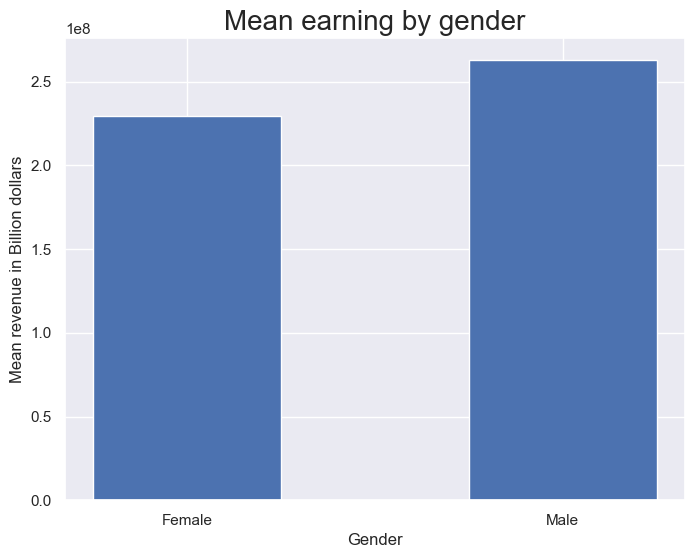

In [548]:
gender_plot=df_actor_movie.groupby('actor_gender')[['revenue']].mean()[1:]
f,ax=plt.subplots(figsize=(8,6))
plt.bar(["Female","Male"],gender_plot["revenue"],width=0.5)
plt.title("Mean earning by gender",fontsize=20)
plt.xlabel("Gender")
plt.ylabel("Mean revenue in Billion dollars")

* Mean earning of males is more

In [549]:
gender_plot

revenue
actor_gender              
1             2.295606e+08
2             2.628484e+08

In [550]:
gender_plot=df_actor_movie.groupby(['actor_gender',"year"])[['revenue']].mean()
gender_plot.unstack(level=0).fillna(0)#.drop(columns=#.plot(kind = 'bar',stacked=True, figsize=(12,6),legend  = True)
#plt.show()

revenue                            
actor_gender             0             1             2
year                                                  
1937.0        1.849255e+08  1.849255e+08  1.849255e+08
1939.0        3.375497e+07  3.375497e+07  3.375497e+07
1940.0        8.332000e+07  0.000000e+00  8.332000e+07
1942.0        2.674472e+08  2.674472e+08  2.674472e+08
1962.0        5.960000e+07  5.960000e+07  5.960000e+07
1963.0        7.889876e+07  7.889876e+07  7.889876e+07
1964.0        8.394237e+07  1.061175e+08  8.266304e+07
1965.0        0.000000e+00  1.411957e+08  1.411957e+08
1966.0        6.000000e+06  0.000000e+00  6.000000e+06
1967.0        1.115848e+08  1.115848e+08  1.115848e+08
1969.0        8.197449e+07  8.197449e+07  8.197449e+07
1970.0        4.000000e+07  4.000000e+07  4.000000e+07
1971.0        4.400558e+07  1.160195e+08  9.361520e+07
1972.0        2.450664e+08  2.450664e+08  2.450664e+08
1973.0        3.015420e+08  3.481300e+08  2.922244e+08
1974.0        9.757200e+07  9.757200e+07  9.757200e+07
1975.0        2.711004e+08  2.637095e+08  3.063157e+08
1977.0        7.192114e+08  4.066734e+08  6.094719e+08
1978.0        1.165172e+08  1.055000e+08  1.154400e+08
1979.0        1.476165e+08  1.376245e+08  1.178747e+08
1980.0        4.493423e+08  1.563794e+08  4.013709e+08
1981.0        2.610155e+08  1.451146e+08  1.976007e+08
1982.0        5.385278e+08  3.180537e+08  9.026184e+07
1983.0        3.825669e+08  2.414255e+08  2.977633e+08
1984.0        2.768319e+08  1.147467e+08  2.198316e+08
1985.0        2.251980e+08  2.432205e+08  2.722498e+08
1986.0        1.100000e+07  1.100000e+07  1.100000e+07
1987.0        1.707770e+08  1.274082e+08  1.080927e+08
1988.0        8.187281e+06  1.079368e+07  1.098822e+07
1989.0        3.567475e+08  2.554880e+08  2.970196e+08
1990.0        1.374454e+08  1.663010e+08  1.792960e+08
1991.0        7.434726e+06  7.434726e+06  7.434726e+06
1992.0        1.909815e+08  3.079510e+08  2.575578e+08
1993.0        3.424594e+08  2.248870e+08  5.511368e+08
1994.0        2.626244e+08  3.558316e+08  3.823998e+08
1995.0        2.531791e+08  1.783503e+08  2.088363e+08
1996.0        1.911339e+08  1.165967e+08  1.551782e+08
1997.0        7.853158e+08  7.688350e+08  6.173689e+08
1998.0        8.029016e+07  1.592071e+08  9.493575e+07
1999.0        2.803258e+08  2.377576e+08  2.453274e+08
2000.0        1.118620e+08  1.105699e+08  1.307231e+08
2001.0        3.774534e+08  3.005035e+08  3.232307e+08
2002.0        2.763334e+08  2.728733e+08  2.990508e+08
2003.0        2.635343e+08  1.987132e+08  2.633589e+08
2004.0        2.429115e+08  2.030079e+08  2.325863e+08
2005.0        2.639256e+08  1.679993e+08  2.214672e+08
2006.0        2.068760e+08  1.364788e+08  1.935160e+08
2007.0        2.655684e+08  2.411973e+08  2.484655e+08
2008.0        2.814613e+08  1.741627e+08  2.074447e+08
2009.0        2.982783e+08  2.269196e+08  2.345395e+08
2010.0        1.785022e+08  1.811904e+08  1.888115e+08
2011.0        1.631113e+08  1.430320e+08  1.933340e+08
2012.0        3.265101e+08  2.575735e+08  3.680976e+08
2013.0        3.458771e+08  3.369184e+08  3.180494e+08
2014.0        3.101392e+08  3.006918e+08  3.826671e+08
2015.0        3.136056e+08  3.254035e+08  3.294777e+08
2016.0        3.231625e+08  2.886579e+08  3.303914e+08

In [551]:
df_actor_movie_count = df_actor_movie.groupby('actor')[['id']].count().sort_values(by ='id',ascending = False)
df_actor_movie_count.columns=["count"]
df_actor_movie_count.head()

count
actor                   
Samuel L. Jackson     29
Matt Damon            26
Morgan Freeman        23
Bill Hader            23
Jonah Hill            22

In [552]:
df_nb_actors = df_actors.groupby('title')[['actor']].count().sort_values(by='actor',ascending = False)
df_nb_actors.rename(columns={"actor": "# of actors"},inplace = True)
df_nb_actors.head(10)

# of actors
title                                          
Rock of Ages                                224
Mr. Smith Goes to Washington                213
Les Misérables                              208
Jason Bourne                                208
You Don't Mess with the Zohan               183
Real Steel                                  172
Star Trek                                   168
Oz: The Great and Powerful                  159
The Dark Knight Rises                       158
Batman v Superman: Dawn of Justice          152

* Rock of Ages has highest no of actors

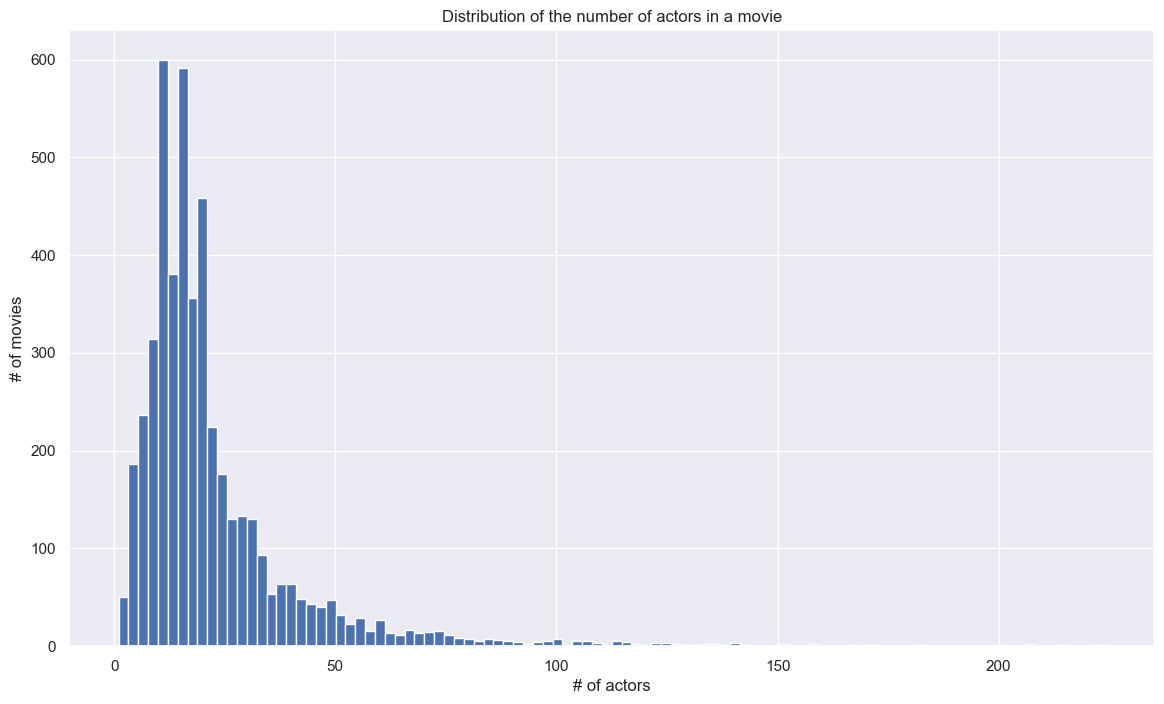

In [553]:
plt.figure(figsize=(14,8))
plt.hist(df_nb_actors['# of actors'],100)
plt.title('Distribution of the number of actors in a movie')
plt.ylabel('No of movies')
plt.xlabel('No of actors')
plt.show()

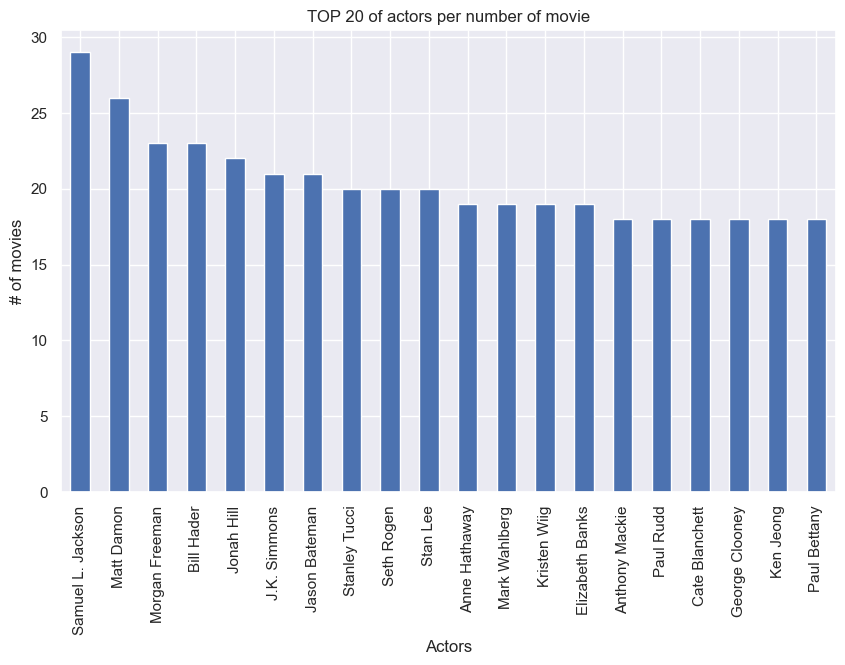

In [554]:
df_actor_movie_count[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('TOP 20 of actors per number of movie')
plt.ylabel("# of movies")
plt.xlabel("Actors")
plt.show()

In [555]:
df_actor_revenue_sum = df_actor_movie.groupby('actor')[['revenue']].sum().sort_values(by ='revenue',ascending = False)
df_actor_revenue_sum.head()

revenue
actor                          
Stan Lee           1.590812e+10
Samuel L. Jackson  1.253272e+10
Frank Welker       9.815289e+09
Hugo Weaving       9.335319e+09
Cate Blanchett     8.923467e+09

Stan Lee generate highest revenue

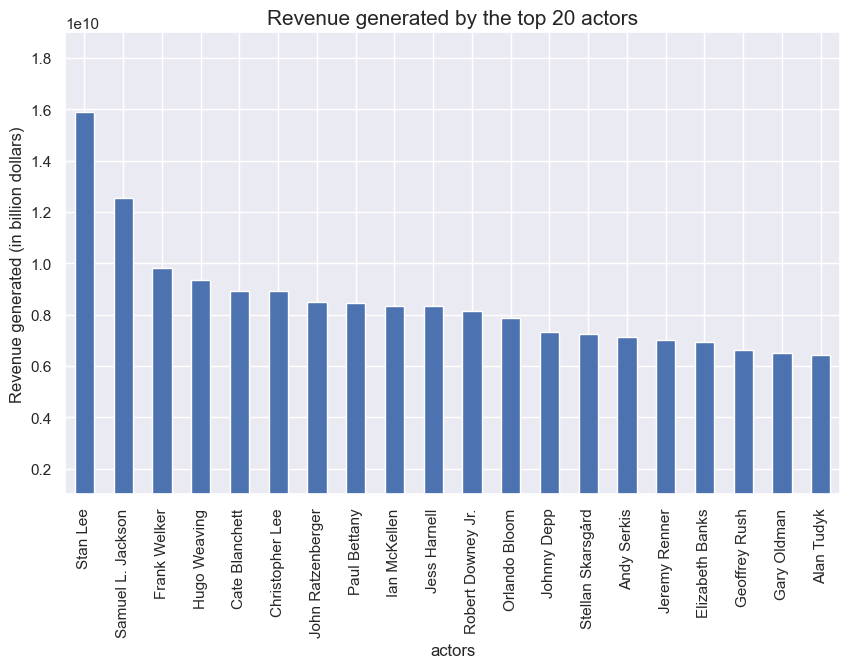

In [556]:
df_actor_revenue_sum[:20].plot(kind ="bar",figsize=(10,6),legend = False)

plt.title('Revenue generated by the top 20 actors',fontsize=15)
plt.ylabel("Revenue generated (in billion dollars)")
plt.xlabel("actors")
plt.ylim(1e9,1e10+9e9)
plt.show()

In [557]:
df_actor_vote = df_actor_movie.groupby('actor')[['vote_average']].mean().sort_values(by ='vote_average',ascending = False)
df_actor_vote.head()

vote_average
actor                        
Victor Rendina            8.4
Nick Vallelonga           8.4
Joseph Medaglia           8.4
Sterling Hayden           8.4
Tony Giorgio              8.4

* Victor Rendina get highest rating

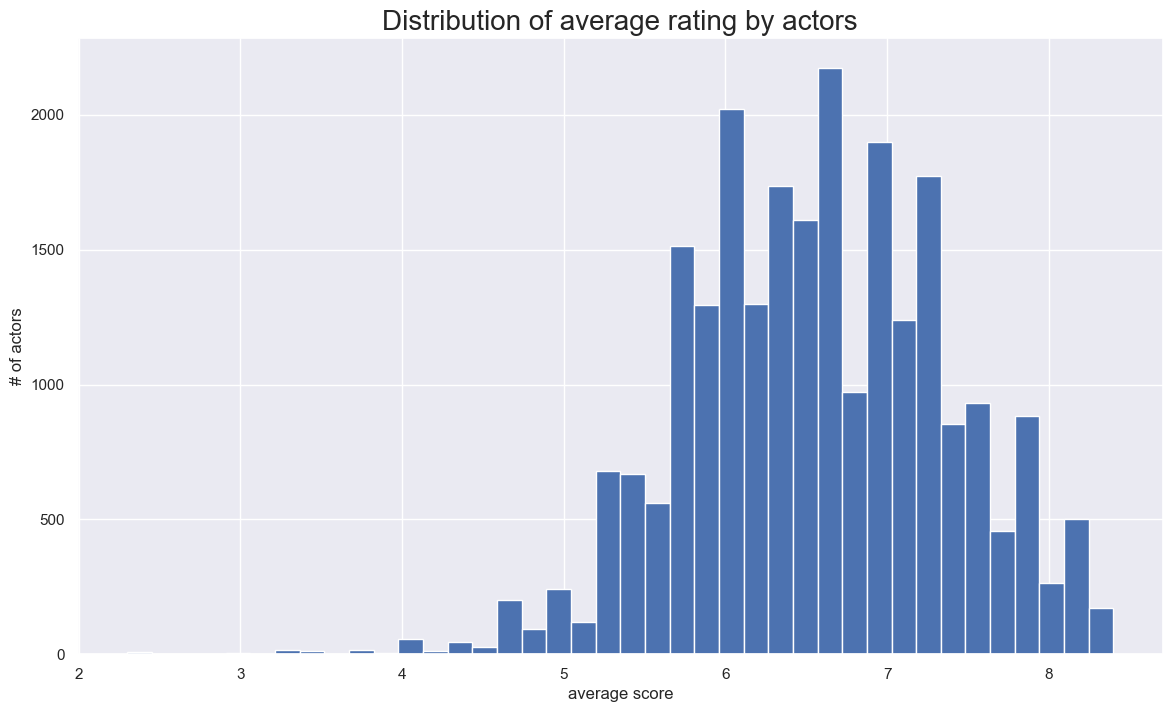

In [558]:
plt.figure(figsize=(14,8))
plt.hist(df_actor_vote['vote_average'],40)
plt.title('Distribution of average rating by actors',fontsize=20)
plt.xlabel('average score')
plt.ylabel('# of actors')
plt.show()

In [559]:
df_actor_movie['actor_gender'].value_counts()

2    16330
0    13083
1     8326
Name: actor_gender, dtype: int64

The industry is dominated by men.

### selecting top 500 actors.

In [560]:
actors_top500 = df_actor_movie_count.head(500).index.values

### Crew 

In [561]:
df_crew = credits_df.set_index('title').crew.apply(pd.Series).stack().reset_index(level= 0).rename(columns={0:'crew'})
df_crew.head()

C:\Users\shromana\AppData\Local\Temp\ipykernel_11936\3629797419.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_crew = credits_df.set_index('title').crew.apply(pd.Series).stack().reset_index(level= 0).rename(columns={0:'crew'})


title                                               crew
0  Avatar            [Stephen E. Rivkin, Editor, Editing, 0]
1  Avatar           [Rick Carter, Production Design, Art, 2]
2  Avatar      [Christopher Boyes, Sound Designer, Sound, 0]
3  Avatar  [Christopher Boyes, Supervising Sound Editor, ...
4  Avatar                [Mali Finn, Casting, Production, 1]

In [562]:
df_crew['crew_name'] = df_crew['crew'].map(lambda x: x[0])
df_crew['crew_job']  = df_crew['crew'].map(lambda x: x[1])
df_crew['crew_department']  = df_crew['crew'].map(lambda x: x[2])
df_crew['crew_gender']  = df_crew['crew'].map(lambda x: x[3])
df_crew.drop(columns = 'crew',inplace = True)
df_crew.head()

title          crew_name                  crew_job crew_department  \
0  Avatar  Stephen E. Rivkin                    Editor         Editing   
1  Avatar        Rick Carter         Production Design             Art   
2  Avatar  Christopher Boyes            Sound Designer           Sound   
3  Avatar  Christopher Boyes  Supervising Sound Editor           Sound   
4  Avatar          Mali Finn                   Casting      Production   

   crew_gender  
0            0  
1            2  
2            0  
3            0  
4            1

In [563]:
df_crew.nunique()

title               4772
crew_name          52234
crew_job             418
crew_department       12
crew_gender            3
dtype: int64

In [564]:
df_crew.crew_job.value_counts()[:10]

Producer                   10206
Executive Producer          6177
Director                    5166
Screenplay                  5010
Editor                      4699
Casting                     4447
Director of Photography     3676
Art Direction               3338
Original Music Composer     3154
Production Design           2837
Name: crew_job, dtype: int64

In [565]:
df_crew.crew_department.value_counts()

Production           27675
Sound                16176
Art                  14853
Crew                 13826
Costume & Make-Up    11188
Writing              10688
Camera                9204
Directing             8149
Editing               7855
Visual Effects        7553
Lighting              2410
Actors                   4
Name: crew_department, dtype: int64

In [566]:
df_crew.crew_gender.value_counts()

0    74817
2    43000
1    11764
Name: crew_gender, dtype: int64

In [567]:
df_crew.groupby('crew_name')[['title']].count().sort_values(by='title', ascending=False).head()

title
crew_name              
Robert Rodriguez    104
Steven Spielberg     84
Avy Kaufman          83
Mary Vernieu         82
Deborah Aquila       75

In [568]:
df_top_dep_crew=df_crew.groupby(['crew_department','crew_name'])[['title']].count().sort_values(by='title', ascending=False)
df_top_dep_crew.head(30)

title
crew_department crew_name                 
Production      Avy Kaufman             83
                Mary Vernieu            82
                Deborah Aquila          75
Sound           James Newton Howard     69
                Hans Zimmer             68
Production      Harvey Weinstein        68
                Tricia Wood             67
                Bob Weinstein           67
                Francine Maisler        63
Sound           John Debney             60
                Danny Elfman            57
Production      Kerry Barden            55
Sound           Kevin Kaska             54
Production      Arnon Milchan           54
                Scott Rudin             54
Sound           Christophe Beck         54
Production      Bruce Berman            52
                John Papsidera          52
Sound           John Williams           52
Production      Tim Bevan               52
                Steven Spielberg        51
                Billy Hopkins           51
Sound           Dan O'Connell           50
Production      Eric Fellner            50
Sound           Marco Beltrami          49
                Alan Silvestri          49
                John Powell             48
                James Horner            48
Production      Denise Chamian          46
Sound           Jerry Goldsmith         46

In [569]:
df_crew.head()

title          crew_name                  crew_job crew_department  \
0  Avatar  Stephen E. Rivkin                    Editor         Editing   
1  Avatar        Rick Carter         Production Design             Art   
2  Avatar  Christopher Boyes            Sound Designer           Sound   
3  Avatar  Christopher Boyes  Supervising Sound Editor           Sound   
4  Avatar          Mali Finn                   Casting      Production   

   crew_gender  
0            0  
1            2  
2            0  
3            0  
4            1

In [570]:
df_crew_department = df_crew.groupby(['title','crew_department']).count().pivot_table(values='crew_name', index='title', columns='crew_department').fillna(0)
df_crew_department.head()

crew_department             Actors  Art  Camera  Costume & Make-Up  Crew  \
title                                                                      
#Horror                        0.0  0.0     0.0                0.0   0.0   
(500) Days of Summer           0.0  3.0     5.0                2.0   2.0   
10 Cloverfield Lane            0.0  9.0     6.0                6.0   6.0   
10 Days in a Madhouse          0.0  0.0     0.0                1.0   0.0   
10 Things I Hate About You     0.0  3.0     3.0                4.0   4.0   

crew_department             Directing  Editing  Lighting  Production  Sound  \
title                                                                         
#Horror                           1.0      0.0       0.0         4.0    0.0   
(500) Days of Summer              2.0      2.0       0.0         8.0    9.0   
10 Cloverfield Lane               2.0      5.0       3.0         6.0    6.0   
10 Days in a Madhouse             1.0      0.0       0.0         6.0    1.0   
10 Things I Hate About You        3.0      2.0       0.0         9.0    6.0   

crew_department             Visual Effects  Writing  
title                                                
#Horror                                0.0      1.0  
(500) Days of Summer                   0.0      2.0  
10 Cloverfield Lane                    7.0      3.0  
10 Days in a Madhouse                  0.0      1.0  
10 Things I Hate About You             0.0      3.0

In [571]:
nb_crew_kept = 1000
top_crew = df_top_dep_crew.index.get_level_values('crew_name')[:nb_crew_kept].values
df_crew_top = df_crew[df_crew.crew_name.map(lambda x: x in top_crew)]
df_crew_top.crew_department.value_counts()

Production           6241
Sound                4998
Camera               1870
Editing              1437
Costume & Make-Up    1340
Art                  1302
Directing             718
Writing               600
Crew                  595
Visual Effects        317
Lighting               24
Name: crew_department, dtype: int64

Some crew member like Steven Spielberg work in several departments.

In [572]:
df_crew[df_crew['crew_name'] == 'Steven Spielberg']['crew_department'].unique()

array(['Production', 'Directing', 'Writing', 'Crew'], dtype=object)

Number of crew per movie

In [573]:
df_crew.groupby(['title']).count()[['crew_name']].sort_values(by='crew_name', ascending=False).head(10)

crew_name
title                                    
Jurassic World                        435
15 Minutes                            338
The Wolf of Wall Street               244
Monsters, Inc.                        242
The Day After Tomorrow                228
The Core                              222
The Dark Knight Rises                 217
The X Files: I Want to Believe        200
V for Vendetta                        194
The Chronicles of Riddick             193

In [574]:
df_crew.groupby(['crew_department','title']).count()[['crew_name']].sort_values(by='crew_name', ascending=False).head(10)

crew_name
crew_department title                                    
Crew            15 Minutes                            180
                Jurassic World                        157
Visual Effects  Monsters, Inc.                        104
                Bolt                                   89
Crew            The X Files: I Want to Believe         89
                The Wolf of Wall Street                89
                V for Vendetta                         88
Visual Effects  Toy Story 2                            81
Crew            The Dark Knight Rises                  68
Visual Effects  Jurassic World                         59

In [575]:
df_crew_movie = df_crew.merge(movie_df, on = 'title', how = 'left').dropna()
df_crew_movie.head()

title          crew_name                  crew_job crew_department  \
0  Avatar  Stephen E. Rivkin                    Editor         Editing   
1  Avatar        Rick Carter         Production Design             Art   
2  Avatar  Christopher Boyes            Sound Designer           Sound   
3  Avatar  Christopher Boyes  Supervising Sound Editor           Sound   
4  Avatar          Mali Finn                   Casting      Production   

   crew_gender       budget                                         genres  \
0            0  237000000.0  [Action, Adventure, Fantasy, Science Fiction]   
1            2  237000000.0  [Action, Adventure, Fantasy, Science Fiction]   
2            0  237000000.0  [Action, Adventure, Fantasy, Science Fiction]   
3            0  237000000.0  [Action, Adventure, Fantasy, Science Fiction]   
4            1  237000000.0  [Action, Adventure, Fantasy, Science Fiction]   

                      homepage       id  \
0  http://www.avatarmovie.com/  19995.0   
1  http://www.avatarmovie.com/  19995.0   
2  http://www.avatarmovie.com/  19995.0   
3  http://www.avatarmovie.com/  19995.0   
4  http://www.avatarmovie.com/  19995.0   

                                            keywords  ... vote_average  \
0  [culture clash, future, space war, space colon...  ...          7.2   
1  [culture clash, future, space war, space colon...  ...          7.2   
2  [culture clash, future, space war, space colon...  ...          7.2   
3  [culture clash, future, space war, space colon...  ...          7.2   
4  [culture clash, future, space war, space colon...  ...          7.2   

  vote_count        profit    year day_of_year month  date       day  \
0    11800.0  2.550965e+09  2009.0       344.0  12.0  10.0  Thursday   
1    11800.0  2.550965e+09  2009.0       344.0  12.0  10.0  Thursday   
2    11800.0  2.550965e+09  2009.0       344.0  12.0  10.0  Thursday   
3    11800.0  2.550965e+09  2009.0       344.0  12.0  10.0  Thursday   
4    11800.0  2.550965e+09  2009.0       344.0  12.0  10.0  Thursday   

   budget_adjusted revenue_adjusted  
0     2.651368e+08     3.118954e+09  
1     2.651368e+08     3.118954e+09  
2     2.651368e+08     3.118954e+09  
3     2.651368e+08     3.118954e+09  
4     2.651368e+08     3.118954e+09  

[5 rows x 32 columns]

In [576]:
df_crew_movie_exploded_genre = df_crew_movie.explode('genres')
df_crew_movie_exploded_genre.groupby(['genres','crew_name'])[['title']].count().sort_values(by='title',ascending= False).head(10)

title
genres    crew_name              
Action    Stan Lee             38
Adventure George Lucas         32
Action    George Lucas         31
Adventure Stan Lee             30
Drama     Francine Maisler     26
Animation John Lasseter        25
Family    John Lasseter        25
Comedy    Judd Apatow          25
Adventure Steven Spielberg     25
Fantasy   Peter Jackson        24

In [577]:
df_crew_movie_exploded_genre.groupby(['genres','crew_name','crew_job'])[['title']].count().sort_values(by='title',ascending= False).head(10)

title
genres    crew_name        crew_job                 
Drama     Francine Maisler Casting                26
Action    Stan Lee         Executive Producer     24
          Dan O'Connell    Foley                  24
          John T. Cucci    Foley                  23
Adventure Kevin Kaska      Orchestrator           22
Action    Sarah Finn       Casting                21
          Brian N. Bentley Compositors            20
Adventure Brian N. Bentley Compositors            20
Action    Kevin Kaska      Orchestrator           19
Drama     Avy Kaufman      Casting                19

In [578]:
df_crew_movie_exploded_genre.groupby(['crew_job','genres'])[['title']].count().sort_values(by='title',ascending= False).head(10)

title
crew_job           genres          
Producer           Drama       1454
                   Action      1159
                   Thriller    1074
                   Comedy       995
Executive Producer Drama        977
                   Action       960
                   Thriller     811
Producer           Adventure    781
Animation          Animation    718
                   Family       700

**The money makers**

In [579]:
df_crew_movie.groupby(['crew_job','crew_name'])[['revenue']].sum().sort_values(by='revenue',ascending= False).head(10)

revenue
crew_job                crew_name                     
Compositors             Brian N. Bentley  1.570392e+10
Orchestrator            Kevin Kaska       1.520811e+10
Original Music Composer Hans Zimmer       1.461007e+10
Executive Producer      Stan Lee          1.440852e+10
Casting                 Sarah Finn        1.221417e+10
Original Music Composer John Williams     1.136667e+10
Producer                Kevin Feige       9.974689e+09
Foley                   Dan O'Connell     9.830710e+09
Original Music Composer Danny Elfman      9.640512e+09
Executive Producer      Louis D'Esposito  9.506158e+09

### Keywords

In [580]:
movie_df.explode('keywords').groupby(['keywords'])[['id']].count().sort_values(by='id', ascending=False)[:10]

id
keywords                 
duringcreditsstinger  270
based on novel        175
woman director        164
aftercreditsstinger   148
murder                143
dystopia              130
independent film      126
violence              126
3d                     91
sequel                 88

In [581]:
interesting_keywords = ["woman director","independent film","based on novel","murder","violence","sex",
                      "nudity","superhero","biography","dystopia", "violence","revenge", "sport","teenager",
                        "3d","love","sequel"]

movie_df.keywords = movie_df.keywords.apply(lambda x :[keyword for keyword in x if keyword in interesting_keywords ])

### Production countries

In [582]:
df_prod_countries_count = movie_df.explode('production_countries')['production_countries'].value_counts()
df_prod_countries_count.head(10)

United States of America    2892
United Kingdom               431
Germany                      232
France                       196
Canada                       161
Australia                     77
Italy                         48
Spain                         43
Japan                         40
China                         37
Name: production_countries, dtype: int64

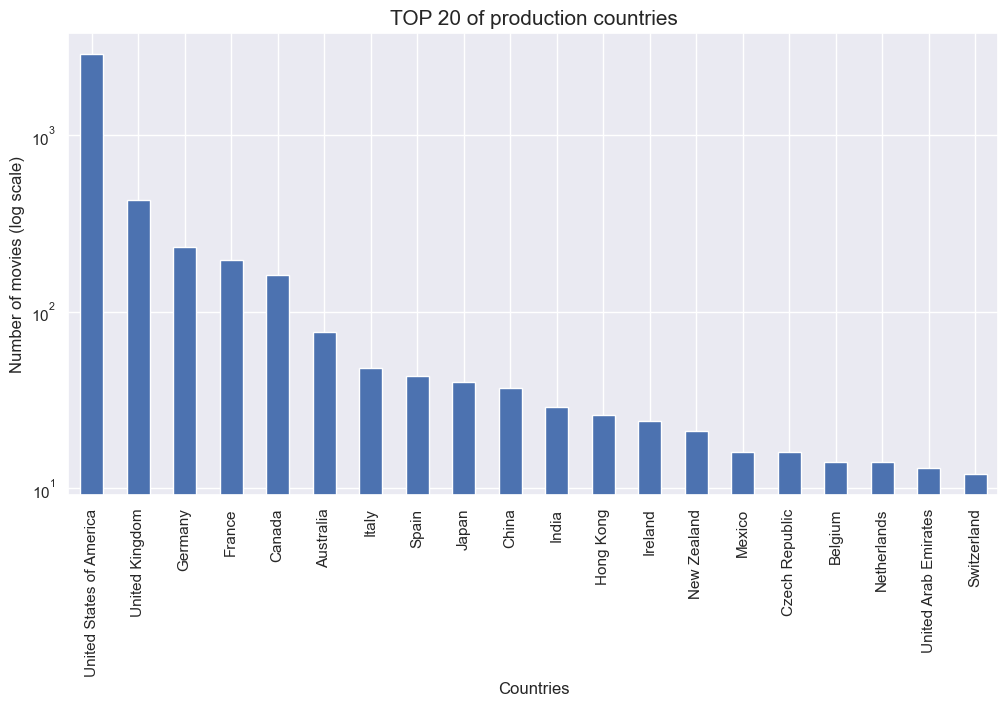

In [583]:
df_prod_countries_count[:20].plot(kind ="bar",figsize=(12,6),legend = False)
plt.title('TOP 20 of production countries',fontsize=15)
plt.ylabel("Number of movies (log scale)")
plt.xlabel("Countries")
plt.yscale("log")
plt.show()

In [584]:
#we only keep the 10 top countries with the most movies, 
interesting_prod_countries = df_prod_countries_count.head(10).index.values
movie_df.production_countries = movie_df.production_countries.apply(lambda x :[prod for prod in x if prod in interesting_prod_countries])

### Spoken languages

In [585]:
df_lang_count = movie_df.explode('spoken_languages')['spoken_languages'].value_counts()
df_lang_count.head(10)

English      3115
Français      303
Español       270
Deutsch       178
Pусский       147
Italiano      142
日本語            82
普通话            79
العربية        55
Português      46
Name: spoken_languages, dtype: int64

C:\Users\shromana\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shromana\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shromana\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shromana\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shromana\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.prin

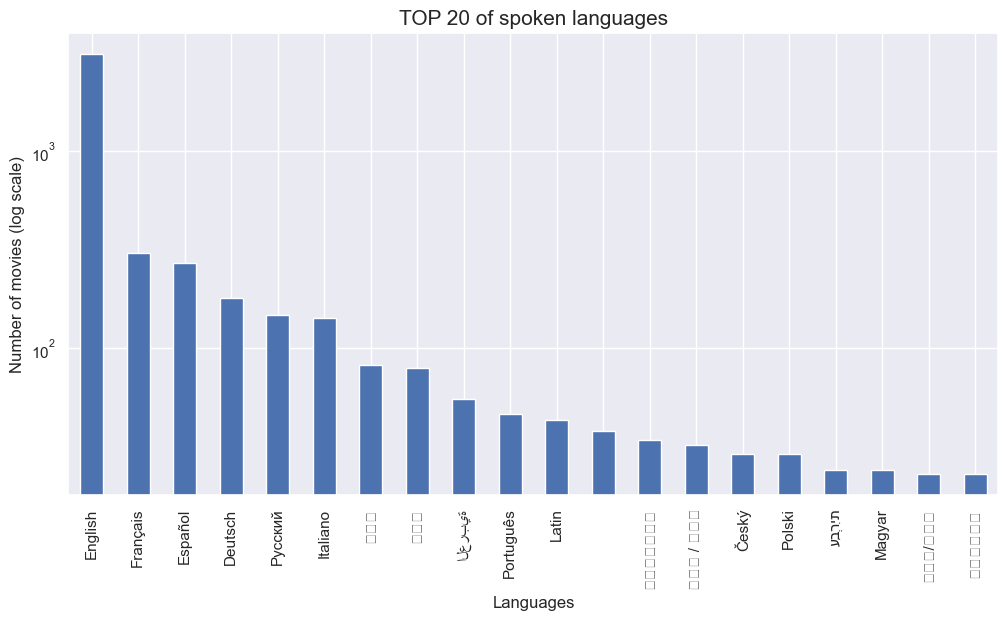

In [586]:
df_lang_count[:20].plot(kind ="bar",figsize=(12,6),legend = False)
plt.title('TOP 20 of spoken languages',fontsize=15)
plt.ylabel("Number of movies (log scale)")
plt.xlabel("Languages")
plt.yscale("log")
plt.show()

In [587]:
interesting_lang = df_lang_count.head(5).index.values
movie_df.spoken_languages = movie_df.spoken_languages.apply(lambda x :[lang for lang in x if lang in interesting_lang])

### original_language

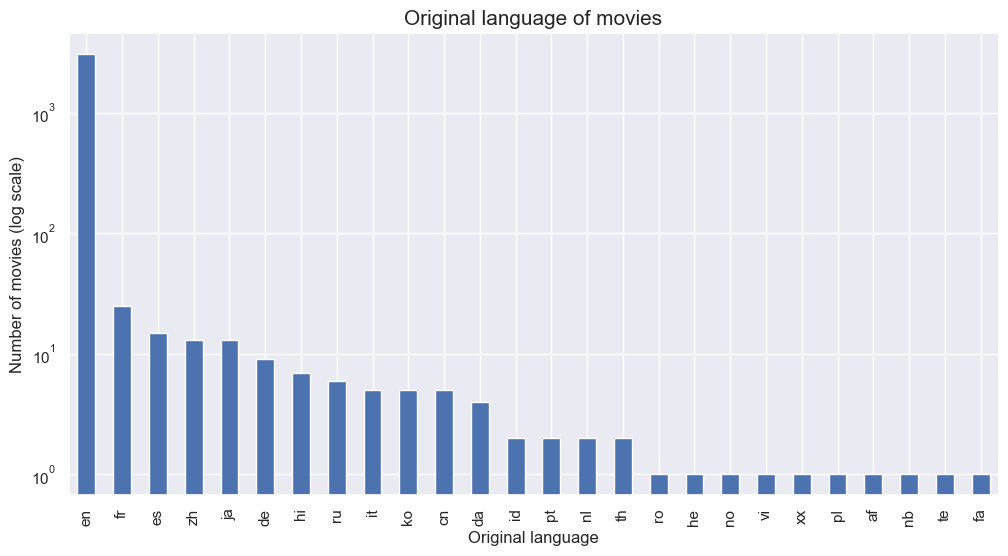

In [588]:
fig , ax =plt.subplots(figsize=(12,6))
movie_df.original_language.value_counts().plot(kind='bar')

plt.yscale("log")
plt.title("Original language of movies",fontsize=15)
plt.xlabel("Original language")
plt.ylabel("Number of movies (log scale)")
plt.show()

* Not keeping it as feature.

### status

In [589]:
movie_df.status.value_counts()

Released    3208
Name: status, dtype: int64

* Not a Relevant feature.

## ML model

* To develop a model to predict movie's revenue.

In [590]:
movie_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'profit', 'year', 'day_of_year', 'month', 'date', 'day',
       'budget_adjusted', 'revenue_adjusted'],
      dtype='object')

### One hot encoding

In [591]:
features_kept = ['title','keywords','budget','genres','popularity', 'production_companies', 
                'production_countries', 'year' ,'day_of_year','month','revenue', 'runtime', 'spoken_languages',
                'vote_average', 'vote_count',]

data = movie_df[features_kept].set_index('title')
data=data[data["year"]>1960]
data.head()

keywords     budget  \
title                                                                           
Avatar                                                        [3d]  237000000   
Pirates of the Caribbean: At World's End                        []  300000000   
Spectre                                   [based on novel, sequel]  245000000   
The Dark Knight Rises                                  [superhero]  250000000   
John Carter                                   [based on novel, 3d]  260000000   

                                                                                 genres  \
title                                                                                     
Avatar                                    [Action, Adventure, Fantasy, Science Fiction]   
Pirates of the Caribbean: At World's End                   [Adventure, Fantasy, Action]   
Spectre                                                      [Action, Adventure, Crime]   
The Dark Knight Rises                                  [Action, Crime, Drama, Thriller]   
John Carter                                        [Action, Adventure, Science Fiction]   

                                          popularity  \
title                                                  
Avatar                                    150.437577   
Pirates of the Caribbean: At World's End  139.082615   
Spectre                                   107.376788   
The Dark Knight Rises                     112.312950   
John Carter                                43.926995   

                                                                       production_companies  \
title                                                                                         
Avatar                                    [Twentieth Century Fox Film Corporation, Dune ...   
Pirates of the Caribbean: At World's End                             [Walt Disney Pictures]   
Spectre                                                                 [Columbia Pictures]   
The Dark Knight Rises                                                        [Warner Bros.]   
John Carter                                                          [Walt Disney Pictures]   

                                                                production_countries  \
title                                                                                  
Avatar                                    [United States of America, United Kingdom]   
Pirates of the Caribbean: At World's End                  [United States of America]   
Spectre                                   [United Kingdom, United States of America]   
The Dark Knight Rises                                     [United States of America]   
John Carter                                               [United States of America]   

                                          year  day_of_year  month  \
title                                                                
Avatar                                    2009          344     12   
Pirates of the Caribbean: At World's End  2007          139      5   
Spectre                                   2015          299     10   
The Dark Knight Rises                     2012          198      7   
John Carter                               2012           67      3   

                                             revenue  runtime  \
title                                                           
Avatar                                    2787965087    162.0   
Pirates of the Caribbean: At World's End   961000000    169.0   
Spectre                                    880674609    148.0   
The Dark Knight Rises                     1084939099    165.0   
John Carter                                284139100    132.0   

                                                               spoken_languages  \
title                                                                             
Avatar                                                       [E

In [592]:
data.shape

(3144, 14)

In [593]:
col_to_explode = ['genres','keywords','production_companies','production_countries','spoken_languages']

for c in col_to_explode: 
    data_exploded = data.explode(c)
    dummies = pd.get_dummies(data_exploded[c]).reset_index().groupby('title').sum()
    data = dummies.join(data).drop(columns = c)

data.head()

Deutsch  English  Español  Français  Pусский  \
title                                                                      
(500) Days of Summer              0        1        0         1        0   
10 Cloverfield Lane               0        1        0         0        0   
10 Things I Hate About You        0        1        0         1        0   
102 Dalmatians                    0        1        0         0        0   
10th & Wolf                       0        1        0         0        0   

                            Australia  Canada  China  France  Germany  ...  \
title                                                                  ...   
(500) Days of Summer                0       0      0       0        0  ...   
10 Cloverfield Lane                 0       0      0       0        0  ...   
10 Things I Hate About You          0       0      0       0        0  ...   
102 Dalmatians                      0       0      0       0        0  ...   
10th & Wolf                         0       0      0       0        0  ...   

                            Western    budget  popularity  year  day_of_year  \
title                                                                          
(500) Days of Summer              0   7500000   45.610993  2009          198   
10 Cloverfield Lane               0  15000000   53.698683  2016           70   
10 Things I Hate About You        0  16000000   54.550275  1999           89   
102 Dalmatians                    0  85000000    9.895061  2000          281   
10th & Wolf                       0   8000000    3.942464  2006           50   

                            month    revenue  runtime  vote_average  \
title                                                                 
(500) Days of Summer            7   60722734     95.0           7.2   
10 Cloverfield Lane             3  108286421    103.0           6.8   
10 Things I Hate About You      3   53478166     97.0           7.3   
102 Dalmatians                 10  183611771    100.0           5.1   
10th & Wolf                     2     143451    107.0           6.3   

                            vote_count  
title                                   
(500) Days of Summer              2904  
10 Cloverfield Lane               2468  
10 Things I Hate About You        1701  
102 Dalmatians                     313  
10th & Wolf                         24  

[5 rows x 79 columns]

In [594]:
data_no_cast=data.copy()

## Adding the actors and crew members

In [595]:
#add nb_of_actors as a feature
data = data.join(df_nb_actors)
data.head()

Deutsch  English  Español  Français  Pусский  \
title                                                                      
(500) Days of Summer              0        1        0         1        0   
10 Cloverfield Lane               0        1        0         0        0   
10 Things I Hate About You        0        1        0         1        0   
102 Dalmatians                    0        1        0         0        0   
10th & Wolf                       0        1        0         0        0   

                            Australia  Canada  China  France  Germany  ...  \
title                                                                  ...   
(500) Days of Summer                0       0      0       0        0  ...   
10 Cloverfield Lane                 0       0      0       0        0  ...   
10 Things I Hate About You          0       0      0       0        0  ...   
102 Dalmatians                      0       0      0       0        0  ...   
10th & Wolf                         0       0      0       0        0  ...   

                              budget  popularity  year  day_of_year  month  \
title                                                                        
(500) Days of Summer         7500000   45.610993  2009          198      7   
10 Cloverfield Lane         15000000   53.698683  2016           70      3   
10 Things I Hate About You  16000000   54.550275  1999           89      3   
102 Dalmatians              85000000    9.895061  2000          281     10   
10th & Wolf                  8000000    3.942464  2006           50      2   

                              revenue  runtime  vote_average  vote_count  \
title                                                                      
(500) Days of Summer         60722734     95.0           7.2        2904   
10 Cloverfield Lane         108286421    103.0           6.8        2468   
10 Things I Hate About You   53478166     97.0           7.3        1701   
102 Dalmatians              183611771    100.0           5.1         313   
10th & Wolf                    143451    107.0           6.3          24   

                            # of actors  
title                                    
(500) Days of Summer               23.0  
10 Cloverfield Lane                10.0  
10 Things I Hate About You         44.0  
102 Dalmatians                      5.0  
10th & Wolf                        13.0  

[5 rows x 80 columns]

In [596]:
df_actor_movie_top500 = df_actor_movie[df_actor_movie.actor.map(lambda x: x in actors_top500)].set_index('title')[['actor']]
df_actor_movie_top500.head()

actor
title                     
Avatar     Sam Worthington
Avatar         Zoe Saldana
Avatar    Sigourney Weaver
Avatar  Michelle Rodriguez
Avatar     Giovanni Ribisi

In [597]:
df_actor_movie_top500 = pd.get_dummies(df_actor_movie_top500)
df_actor_movie_top500.reset_index(inplace = True)
df_actor_movie_top500 = df_actor_movie_top500.groupby('title').sum()
df_actor_movie_top500.head()

actor_Aaron Eckhart  \
title                                                            
(500) Days of Summer                                         0   
10 Cloverfield Lane                                          0   
13 Hours: The Secret Soldiers of Benghazi                    0   
1408                                                         0   
17 Again                                                     0   

                                           actor_Aasif Mandvi  \
title                                                           
(500) Days of Summer                                        0   
10 Cloverfield Lane                                         0   
13 Hours: The Secret Soldiers of Benghazi                   0   
1408                                                        0   
17 Again                                                    0   

                                           actor_Abigail Breslin  \
title                                                              
(500) Days of Summer                                           0   
10 Cloverfield Lane                                            0   
13 Hours: The Secret Soldiers of Benghazi                      0   
1408                                                           0   
17 Again                                                       0   

                                           actor_Adam Sandler  \
title                                                           
(500) Days of Summer                                        0   
10 Cloverfield Lane                                         0   
13 Hours: The Secret Soldiers of Benghazi                   0   
1408                                                        0   
17 Again                                                    0   

                                           actor_Alan Arkin  \
title                                                         
(500) Days of Summer                                      0   
10 Cloverfield Lane                                       0   
13 Hours: The Secret Soldiers of Benghazi                 0   
1408                                                      0   
17 Again                                                  0   

                                           actor_Alan Rickman  \
title                                                           
(500) Days of Summer                                        0   
10 Cloverfield Lane                                         0   
13 Hours: The Secret Soldiers of Benghazi                   0   
1408                                                        0   
17 Again                                                    0   

                                           actor_Alan Tudyk  \
title                                                         
(500) Days of Summer                                      0   
10 Cloverfield Lane                                       0   
13 Hours: The Secret Soldiers of Benghazi                 0   
1408                                                      0   
17 Again                                                  0   

                                           actor_Albert Brooks  \
title                                                            
(500) Days of Summer                                         0   
10 Cloverfield Lane                                          0   
13 Hours: The Secret Soldiers of Benghazi                    0   
1408                                                         0   
17 Again                                                     0   

                                           actor_Alec Baldwin  \
title                                                           
(500) Days of Summer                                        0   
10 Cloverfield Lane                                         0   
13 Hours: The Secret Soldiers of Benghazi                   0   
1408                                                        0  

In [598]:
data = data.join(df_actor_movie_top500, how= 'left') 
data.fillna(0, inplace = True) #some movie don't have 1 of the 500 top actors
data.head()

Deutsch  English  Español  Français  Pусский  \
title                                                                      
(500) Days of Summer              0        1        0         1        0   
10 Cloverfield Lane               0        1        0         0        0   
10 Things I Hate About You        0        1        0         1        0   
102 Dalmatians                    0        1        0         0        0   
10th & Wolf                       0        1        0         0        0   

                            Australia  Canada  China  France  Germany  ...  \
title                                                                  ...   
(500) Days of Summer                0       0      0       0        0  ...   
10 Cloverfield Lane                 0       0      0       0        0  ...   
10 Things I Hate About You          0       0      0       0        0  ...   
102 Dalmatians                      0       0      0       0        0  ...   
10th & Wolf                         0       0      0       0        0  ...   

                            actor_Willem Dafoe  actor_William Fichtner  \
title                                                                    
(500) Days of Summer                       0.0                     0.0   
10 Cloverfield Lane                        0.0                     0.0   
10 Things I Hate About You                 0.0                     0.0   
102 Dalmatians                             0.0                     0.0   
10th & Wolf                                0.0                     0.0   

                            actor_William H. Macy  actor_Woody Harrelson  \
title                                                                      
(500) Days of Summer                          0.0                    0.0   
10 Cloverfield Lane                           0.0                    0.0   
10 Things I Hate About You                    0.0                    0.0   
102 Dalmatians                                0.0                    0.0   
10th & Wolf                                   0.0                    0.0   

                            actor_Yvette Nicole Brown  \
title                                                   
(500) Days of Summer                              1.0   
10 Cloverfield Lane                               0.0   
10 Things I Hate About You                        0.0   
102 Dalmatians                                    0.0   
10th & Wolf                                       0.0   

                            actor_Zach Galifianakis  actor_Zeljko Ivanek  \
title                                                                      
(500) Days of Summer                            0.0                  0.0   
10 Cloverfield Lane                             0.0                  0.0   
10 Things I Hate About You                      0.0                  0.0   
102 Dalmatians                                  0.0                  0.0   
10th & Wolf                                     0.0                  0.0   

                            actor_Zoe Saldana  actor_Zooey Deschanel  \
title                                                                  
(500) Days of Summer                      0.0                    1.0   
10 Cloverfield Lane                       0.0                    0.0   
10 Things I Hate About You                0.0                    0.0   
102 Dalmatians                            0.0                    0.0   
10th & Wolf                               0.0                    0.0   

                            actor_Zoë Kravitz  
title                                          
(500) Days of Summer                      0.0  
10 Cloverfield Lane                       0.0  
10 Things I Hate About You                0.0  
102 Dalmatians                            0.0  
10th & Wolf                               0.0  

[5 rows x 580 columns]

In [599]:
#keep only unique name per movie (exemple problem of Spielberg)
df_crew_top = df_crew_top.groupby(['title','crew_name']).count().reset_index()[['title','crew_name']].set_index('title')
df_crew_top.head()

crew_name
title                                    
(500) Days of Summer        Mychael Danna
10 Cloverfield Lane           Andy Kaplan
10 Cloverfield Lane         Phil Pastuhov
10 Cloverfield Lane            Will Files
10 Things I Hate About You   Andrew Lazar

In [600]:
df_crew_top.nunique()

crew_name    980
dtype: int64

In [601]:
df_crew_dummies = pd.get_dummies(df_crew_top)
df_crew_dummies.reset_index(inplace = True)
df_crew_dummies = df_crew_dummies.groupby('title').sum()
df_crew_dummies.head()

crew_name_Aaron Williams  crew_name_Aaron Zigman  \
title                                                                          
(500) Days of Summer                               0                       0   
10 Cloverfield Lane                                0                       0   
10 Things I Hate About You                         0                       0   
102 Dalmatians                                     0                       0   
11:14                                              0                       0   

                            crew_name_Adam Dale  crew_name_Adam Jenkins  \
title                                                                     
(500) Days of Summer                          0                       0   
10 Cloverfield Lane                           0                       0   
10 Things I Hate About You                    0                       0   
102 Dalmatians                                0                       0   
11:14                                         0                       0   

                            crew_name_Adam Milo Smalley  \
title                                                     
(500) Days of Summer                                  0   
10 Cloverfield Lane                                   0   
10 Things I Hate About You                            0   
102 Dalmatians                                        0   
11:14                                                 0   

                            crew_name_Adam Sandler  crew_name_Adrian Biddle  \
title                                                                         
(500) Days of Summer                             0                        0   
10 Cloverfield Lane                              0                        0   
10 Things I Hate About You                       0                        0   
102 Dalmatians                                   0                        1   
11:14                                            0                        0   

                            crew_name_Aggie Guerard Rodgers  \
title                                                         
(500) Days of Summer                                      0   
10 Cloverfield Lane                                       0   
10 Things I Hate About You                                0   
102 Dalmatians                                            0   
11:14                                                     0   

                            crew_name_Ai-Ling Lee  crew_name_Akiva Goldsman  \
title                                                                         
(500) Days of Summer                            0                         0   
10 Cloverfield Lane                             0                         0   
10 Things I Hate About You                      0                         0   
102 Dalmatians                                  0                         0   
11:14                                           0                         0   

                            ...  crew_name_William R. Dean  \
title                       ...                              
(500) Days of Summer        ...                          0   
10 Cloverfield Lane         ...                          0   
10 Things I Hate About You  ...                          0   
102 Dalmatians              ...                          0   
11:14                       ...                          0   

                            crew_name_William Steinkamp  \
title                                                     
(500) Days of Summer                                  0   
10 Cloverfield Lane                                   0   
10 Things I Hate About You                            0   
102 Dalmatians                                        0   
11:14                                                 0   

                            crew_name_Willie D. Burton  \
title                                                    
(500) Days o

In [602]:
data = data.join(df_crew_dummies, how= 'left').fillna(0)
data.head()

Deutsch  English  Español  Français  Pусский  \
title                                                                      
(500) Days of Summer              0        1        0         1        0   
10 Cloverfield Lane               0        1        0         0        0   
10 Things I Hate About You        0        1        0         1        0   
102 Dalmatians                    0        1        0         0        0   
10th & Wolf                       0        1        0         0        0   

                            Australia  Canada  China  France  Germany  ...  \
title                                                                  ...   
(500) Days of Summer                0       0      0       0        0  ...   
10 Cloverfield Lane                 0       0      0       0        0  ...   
10 Things I Hate About You          0       0      0       0        0  ...   
102 Dalmatians                      0       0      0       0        0  ...   
10th & Wolf                         0       0      0       0        0  ...   

                            crew_name_William R. Dean  \
title                                                   
(500) Days of Summer                              0.0   
10 Cloverfield Lane                               0.0   
10 Things I Hate About You                        0.0   
102 Dalmatians                                    0.0   
10th & Wolf                                       0.0   

                            crew_name_William Steinkamp  \
title                                                     
(500) Days of Summer                                0.0   
10 Cloverfield Lane                                 0.0   
10 Things I Hate About You                          0.0   
102 Dalmatians                                      0.0   
10th & Wolf                                         0.0   

                            crew_name_Willie D. Burton  \
title                                                    
(500) Days of Summer                               0.0   
10 Cloverfield Lane                                0.0   
10 Things I Hate About You                         0.0   
102 Dalmatians                                     0.0   
10th & Wolf                                        0.0   

                            crew_name_Wilma Garscadden-Gahret  \
title                                                           
(500) Days of Summer                                      0.0   
10 Cloverfield Lane                                       0.0   
10 Things I Hate About You                                0.0   
102 Dalmatians                                            0.0   
10th & Wolf                                               0.0   

                            crew_name_Woody Allen  crew_name_Wyck Godfrey  \
title                                                                       
(500) Days of Summer                          0.0                     0.0   
10 Cloverfield Lane                           0.0                     0.0   
10 Things I Hate About You                    0.0                     0.0   
102 Dalmatians                                0.0                     0.0   
10th & Wolf                                   0.0                     0.0   

                            crew_name_Wylie Stateman  \
title                                                  
(500) Days of Summer                             0.0   
10 Cloverfield Lane                              0.0   
10 Things I Hate About You                       0.0   
102 Dalmatians                                   0.0   
10th & Wolf                                      0.0   

                            crew_name_Yolanda Toussieng  \
title                                                     
(500) Days of Summer                                0.0   
10 Cloverfield Lane                                 0.0   
10 Things I Hate About You                          0.0   
102 Dalmatians                             

In [603]:
df_crew_department.head()

crew_department             Actors  Art  Camera  Costume & Make-Up  Crew  \
title                                                                      
#Horror                        0.0  0.0     0.0                0.0   0.0   
(500) Days of Summer           0.0  3.0     5.0                2.0   2.0   
10 Cloverfield Lane            0.0  9.0     6.0                6.0   6.0   
10 Days in a Madhouse          0.0  0.0     0.0                1.0   0.0   
10 Things I Hate About You     0.0  3.0     3.0                4.0   4.0   

crew_department             Directing  Editing  Lighting  Production  Sound  \
title                                                                         
#Horror                           1.0      0.0       0.0         4.0    0.0   
(500) Days of Summer              2.0      2.0       0.0         8.0    9.0   
10 Cloverfield Lane               2.0      5.0       3.0         6.0    6.0   
10 Days in a Madhouse             1.0      0.0       0.0         6.0    1.0   
10 Things I Hate About You        3.0      2.0       0.0         9.0    6.0   

crew_department             Visual Effects  Writing  
title                                                
#Horror                                0.0      1.0  
(500) Days of Summer                   0.0      2.0  
10 Cloverfield Lane                    7.0      3.0  
10 Days in a Madhouse                  0.0      1.0  
10 Things I Hate About You             0.0      3.0

In [604]:
#add number of crew per department 
data = data.join(df_crew_department, how = 'left').fillna(0)
data.head()

Deutsch  English  Español  Français  Pусский  \
title                                                                      
(500) Days of Summer              0        1        0         1        0   
10 Cloverfield Lane               0        1        0         0        0   
10 Things I Hate About You        0        1        0         1        0   
102 Dalmatians                    0        1        0         0        0   
10th & Wolf                       0        1        0         0        0   

                            Australia  Canada  China  France  Germany  ...  \
title                                                                  ...   
(500) Days of Summer                0       0      0       0        0  ...   
10 Cloverfield Lane                 0       0      0       0        0  ...   
10 Things I Hate About You          0       0      0       0        0  ...   
102 Dalmatians                      0       0      0       0        0  ...   
10th & Wolf                         0       0      0       0        0  ...   

                            Camera  Costume & Make-Up  Crew  Directing  \
title                                                                    
(500) Days of Summer           5.0                2.0   2.0        2.0   
10 Cloverfield Lane            6.0                6.0   6.0        2.0   
10 Things I Hate About You     3.0                4.0   4.0        3.0   
102 Dalmatians                 1.0                0.0   0.0        1.0   
10th & Wolf                    0.0                0.0   0.0        1.0   

                            Editing  Lighting  Production  Sound  \
title                                                              
(500) Days of Summer            2.0       0.0         8.0    9.0   
10 Cloverfield Lane             5.0       3.0         6.0    6.0   
10 Things I Hate About You      2.0       0.0         9.0    6.0   
102 Dalmatians                  1.0       0.0         1.0    1.0   
10th & Wolf                     0.0       0.0         0.0    0.0   

                            Visual Effects  Writing  
title                                                
(500) Days of Summer                   0.0      2.0  
10 Cloverfield Lane                    7.0      3.0  
10 Things I Hate About You             0.0      3.0  
102 Dalmatians                         1.0      7.0  
10th & Wolf                            0.0      2.0  

[5 rows x 1572 columns]

In [605]:
# add total number of crew
df_crew_number = df_crew.groupby('title').count()[['crew_name']].rename(columns = {'crew_name': '# crew'})
data = data.join(df_crew_number, how = 'left').fillna(0)
data.head()

Deutsch  English  Español  Français  Pусский  \
title                                                                      
(500) Days of Summer              0        1        0         1        0   
10 Cloverfield Lane               0        1        0         0        0   
10 Things I Hate About You        0        1        0         1        0   
102 Dalmatians                    0        1        0         0        0   
10th & Wolf                       0        1        0         0        0   

                            Australia  Canada  China  France  Germany  ...  \
title                                                                  ...   
(500) Days of Summer                0       0      0       0        0  ...   
10 Cloverfield Lane                 0       0      0       0        0  ...   
10 Things I Hate About You          0       0      0       0        0  ...   
102 Dalmatians                      0       0      0       0        0  ...   
10th & Wolf                         0       0      0       0        0  ...   

                            Costume & Make-Up  Crew  Directing  Editing  \
title                                                                     
(500) Days of Summer                      2.0   2.0        2.0      2.0   
10 Cloverfield Lane                       6.0   6.0        2.0      5.0   
10 Things I Hate About You                4.0   4.0        3.0      2.0   
102 Dalmatians                            0.0   0.0        1.0      1.0   
10th & Wolf                               0.0   0.0        1.0      0.0   

                            Lighting  Production  Sound  Visual Effects  \
title                                                                     
(500) Days of Summer             0.0         8.0    9.0             0.0   
10 Cloverfield Lane              3.0         6.0    6.0             7.0   
10 Things I Hate About You       0.0         9.0    6.0             0.0   
102 Dalmatians                   0.0         1.0    1.0             1.0   
10th & Wolf                      0.0         0.0    0.0             0.0   

                            Writing  # crew  
title                                        
(500) Days of Summer            2.0    35.0  
10 Cloverfield Lane             3.0    59.0  
10 Things I Hate About You      3.0    37.0  
102 Dalmatians                  7.0    13.0  
10th & Wolf                     2.0     3.0  

[5 rows x 1573 columns]

## Revenue prediction

In [606]:
seed=42
split_size=0.2

## Train_Test_Splitting

In [607]:
def preprocess(data,y,x_to_drop,seed=seed,split_size=split_size):

    data.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)
    y=data[y]
    X=data.drop(columns=x_to_drop)
    X = sm.add_constant(X)
    scaler = StandardScaler()
    X_transformed = scaler.fit_transform(X)
    X = pd.DataFrame(X_transformed, columns = X.columns,index=y.index)

    # splitting the data
    return train_test_split(X, y, test_size=split_size, random_state=seed)

In [608]:
def adjusted_r_2(y_test,y_pred,n,p):
    r2=r2_score(y_test,y_pred)
    return 1-(1-r2)*(n-1)/(n-p-1)

In [609]:
X_train, X_test, y_train, y_test=preprocess(data_no_cast,"revenue",["revenue","vote_count","vote_average","popularity"])

In [610]:
data_no_cast.shape

(3144, 79)

In [611]:
X_train.shape

(2515, 76)

In [612]:
y_pred=np.ones(y_test.shape) * np.mean(y_train)
print("Baseline")
adjusted_r_2(y_test,y_pred,len(y_train),1)

Baseline


-0.006268879201693833

### Regression without cast

#### OLS

In [613]:
y_pred=sm.OLS(y_train, X_train).fit().predict(X_test)
print("OLS Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_train.shape[1]))

OLS Score: -0.18339173459910385


#### Ridge Regression

Ridge Regression Score: 0.4888289301738503


Text(0, 0.5, 'Mean Squared Error')

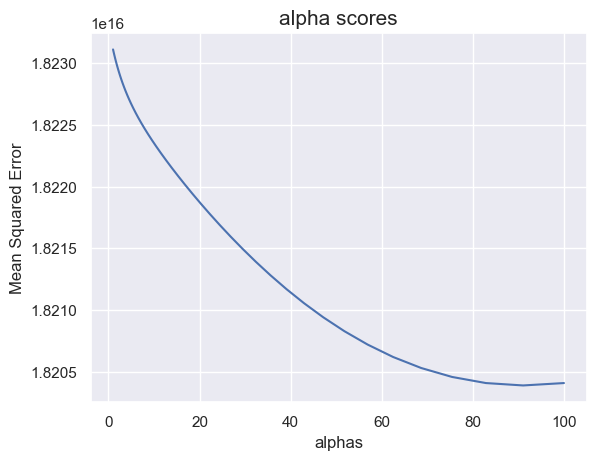

In [614]:
alphas=np.logspace(0,2,50)
clf = RidgeCV(alphas=alphas,store_cv_values=True).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Ridge Regression Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_train.shape[1]))
plt.plot(alphas,np.apply_along_axis(np.mean,0,clf.cv_values_))
plt.title("alpha scores",fontsize=15)
plt.xlabel("alphas")
plt.ylabel("Mean Squared Error")

#### XGboost

In [615]:

regressor = XGBRegressor(colsample_bytree= 1, max_depth= 4, min_child_weight= 2,
                         subsample = 0.7, objective='reg:squarederror',verbosity=1,learning_rate=0.1,randomstate=42)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
print("XGBoost retained {} features".format(sum(regressor.feature_importances_>0)))
print("XGBoost Score:",adjusted_r_2(y_test, y_pred,len(y_train),sum(regressor.feature_importances_>0)))

C:\Users\shromana\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [03:00:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "randomstate" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost retained 61 features
XGBoost Score: 0.5217022620983512


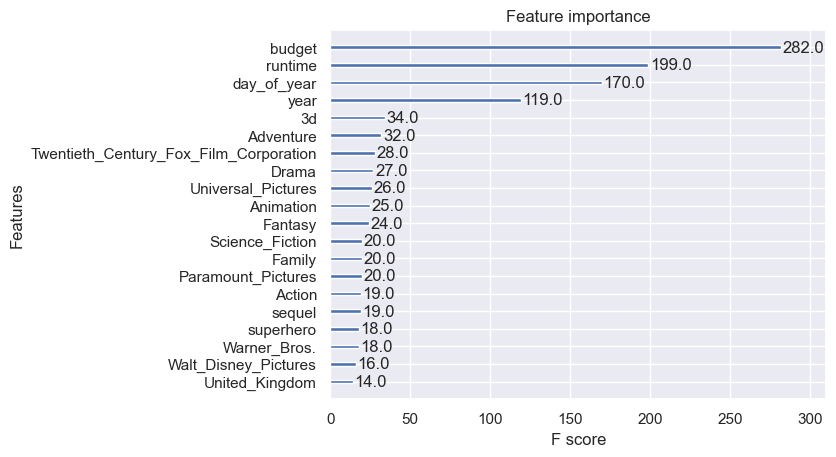

In [616]:

plot_importance(regressor,max_num_features = 20)
plt.show()

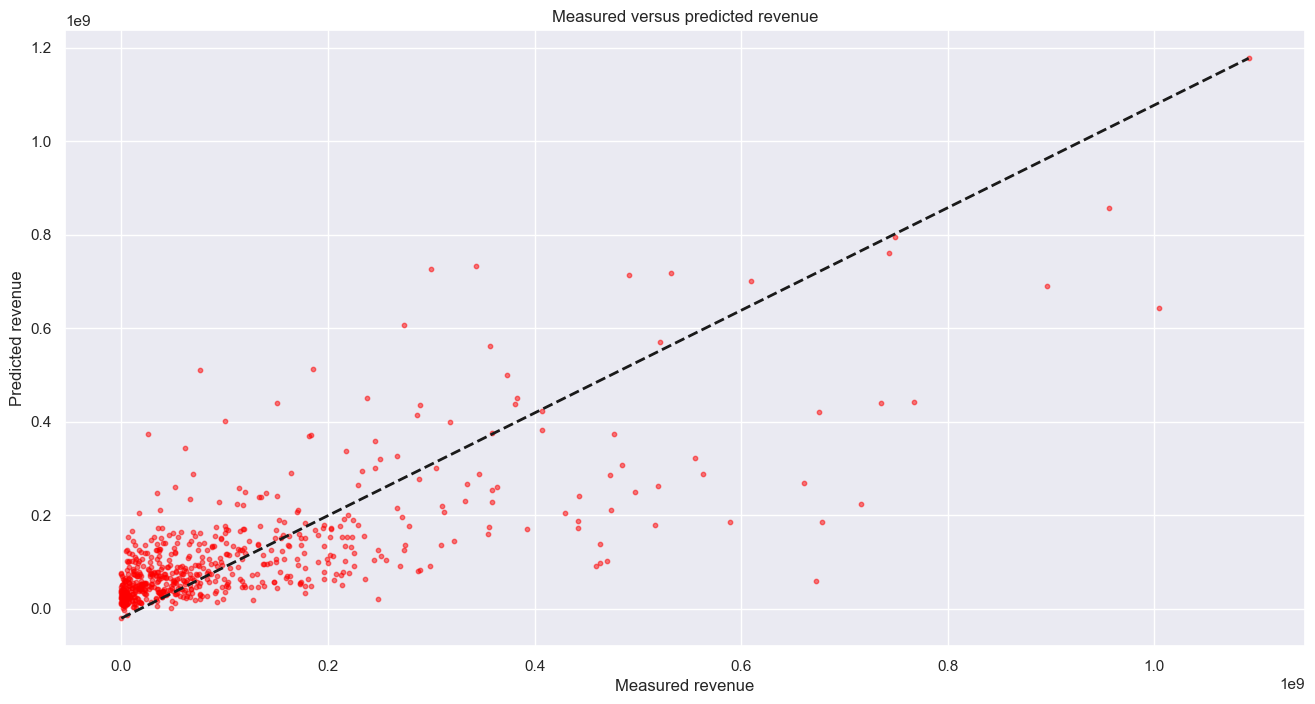

In [617]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(y_test, y_pred,alpha=0.5,s=10,c="red")
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
ax.set_xlabel('Measured revenue')
ax.set_ylabel('Predicted revenue')
plt.title('Measured versus predicted revenue')    
plt.show()

In [618]:
features_no_cast=pd.Series(regressor.feature_importances_,index=X_train.columns)

### Regression with cast

In [619]:
X_train, X_test, y_train, y_test=preprocess(data,"revenue",["revenue","vote_count","vote_average","popularity"])
X_train.shape

(2515, 1570)

#### Ridge Regression

Ridge Regression Score: -0.6771536443807011


Text(0.5, 1.0, 'alpha scores')

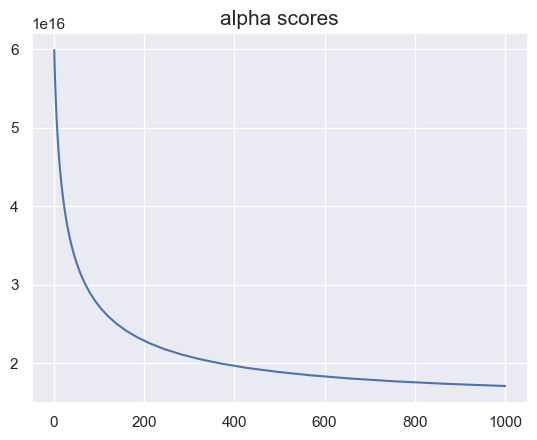

In [620]:
alphas=np.logspace(0,3,50)
clf = RidgeCV(alphas=alphas,store_cv_values=True).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Ridge Regression Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_train.shape[1]))
plt.plot(alphas,np.apply_along_axis(np.mean,0,clf.cv_values_))
plt.title("alpha scores",fontsize=15)

#### OLS

In [621]:
model = sm.OLS(y_train, X_train,hasconst=True)
result = model.fit()
y_pred=result.predict(X_test)
print("OLS Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_train.shape[1]))

OLS Score: -3.799829559232175e+24


#### iterative feature reduction based on significance

In [622]:
p_value=0.05

significant_features=np.asarray(result.pvalues[result.pvalues<p_value].index)
X_sig_train=X_train.copy()
X_sig_test=X_test.copy()
while(len(significant_features)<X_sig_train.shape[1]):
    X_sig_train=X_train[significant_features]
    X_sig_test=X_test[significant_features]
    model = sm.OLS(y_train, X_sig_train)
    result = model.fit()
    significant_features=np.asarray(result.pvalues[result.pvalues<p_value].index)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                revenue   R-squared (uncentered):                  -8.764
Model:                            OLS   Adj. R-squared (uncentered):             -8.962
Method:                 Least Squares   F-statistic:                             -44.25
Date:                Mon, 01 Apr 2024   Prob (F-statistic):                        1.00
Time:                        03:01:18   Log-Likelihood:                         -51145.
No. Observations:                2515   AIC:                                  1.024e+05
Df Residuals:                    2465   BIC:                                  1.027e+05
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Twentieth_Century_Fox_Film_Corporation  8.064e+06   3.42e+06      2.358      0.018    1.36e+06    1.48e+07
3d                                      1.379e+07   3.58e+06      3.855      0.000    6.78e+06    2.08e+07
budget                                  8.896e+07   4.06e+06     21.889      0.000     8.1e+07    9.69e+07
#_of_actors                             2.578e+07    3.6e+06      7.171      0.000    1.87e+07    3.28e+07
actor_Adam_Sandler                     -8.518e+06   3.78e+06     -2.254      0.024   -1.59e+07   -1.11e+06
actor_Anthony_Daniels                   1.675e+07   3.39e+06      4.943      0.000    1.01e+07    2.34e+07
actor_Clifton_Collins_Jr               -8.789e+06   3.92e+06     -2.241      0.025   -1.65e+07    -1.1e+06
actor_Denis_Leary                       1.589e+07   3.59e+06      4.423      0.000    8.85e+06    2.29e+07
actor_Fred_Tatasciore                   1.196e+07   3.27e+06      3.659      0.000    5.55e+06    1.84e+07
actor_Geoffrey_Rush                     2.319e+07   3.58e+06      6.474      0.000    1.62e+07    3.02e+07
actor_Giovanni_Ribisi                   1.629e+07   3.41e+06      4.777      0.000     9.6e+06     2.3e+07
actor_Ian_Holm                          1.488e+07   3.52e+06      4.223      0.000    7.97e+06    2.18e+07
actor_Jan_Rabson                        2.032e+07    3.7e+06      5.497      0.000    1.31e+07    2.76e+07
actor_Jeremy_Renner                     1.083e+07   3.68e+06      2.942      0.003    3.61e+06     1.8e+07
actor_John_Ortiz                       -1.166e+07   4.36e+06     -2.674      0.008   -2.02e+07   -3.11e+06
actor_Kristen_Wiig                      9.159e+06   3.15e+06      2.911      0.004    2.99e+06    1.53e+07
actor_Leonardo_DiCaprio                 8.218e+06   3.04e+06      2.699      0.007    2.25e+06    1.42e+07
actor_Liam_Hemsworth                    1.777e+07    3.6e+06      4.941      0.000    1.07e+07    2.48e+07
actor_Mike_Myers                        1.212e+07   3.56e+06      3.407      0.001    5.15e+06    1.91e+07
actor_Robert_Downey_Jr.                 1.049e+07   3.14e+06      3.344      0.001    4.34e+06    1.66e+07
actor_Terry_Notary                      1.373e+07   3.51e+06      3.917      0.000    6.86e+06    2.06e+07
actor_Warwick_Davis                     1.027e+07   3.46e+06      2.973      0.003     3.5e+06     1.7e+07
actor_Will_Forte                       -7.183e+06   3.33e+06     -2.158      0.031   -1.37e+07   -6.58e+05
actor_William_Fichtner                 -1.544e+07    4.1e+06     -3.767      0.000   -2.35e+07    -7.4e+06
crew_name_Andrew_Lesnie                 1.604e+07   3.86e+06      4.160      0.000    8.48e+06 

In [623]:
y_pred=sm.OLS(y_train, X_sig_train).fit().predict(X_sig_test)
print("OLS with feature selection Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_sig_train.shape[1]))

OLS with feature selection Score: -0.33370460392337287


In [624]:
result.params.sort_values().head(10)

crew_name_Jon_Jashni       -1.937337e+07
crew_name_Randi_Hiller     -1.561383e+07
actor_William_Fichtner     -1.544105e+07
crew_name_William_Fay      -1.443769e+07
actor_John_Ortiz           -1.165977e+07
crew_name_Doug_Coleman     -9.522186e+06
actor_Clifton_Collins_Jr   -8.788593e+06
crew_name_Anne_Kuljian     -8.520375e+06
actor_Adam_Sandler         -8.518134e+06
crew_name_Daniel_Mindel    -7.788956e+06
dtype: float64

##### The money makers

In [625]:
result.params.sort_values(ascending=False).head(10)

budget                          8.896381e+07
#_of_actors                     2.578099e+07
crew_name_Thomas_Tull           2.479538e+07
actor_Geoffrey_Rush             2.318885e+07
actor_Jan_Rabson                2.032475e+07
crew_name_Sarah_Finn            2.014735e+07
crew_name_Deborah_Lynn_Scott    1.820144e+07
actor_Liam_Hemsworth            1.776765e+07
actor_Anthony_Daniels           1.674666e+07
actor_Giovanni_Ribisi           1.628735e+07
dtype: float64

It's interesting to see that crew members highly affect the predictions

Text(0.5, 1.0, 'alpha scores')

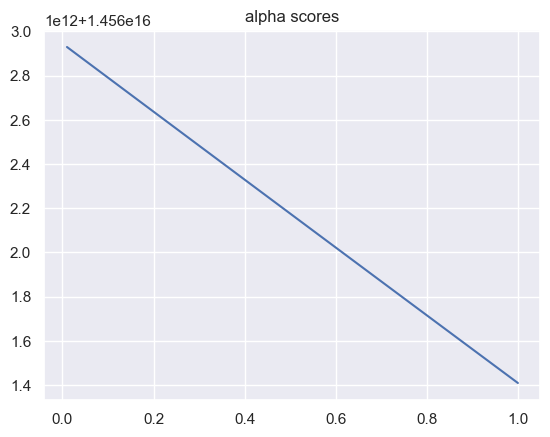

In [626]:
alphas=np.logspace(-2,0,50)
clf = RidgeCV(alphas=alphas,store_cv_values=True).fit(X_sig_train, y_train)
plt.plot(alphas,np.apply_along_axis(np.mean,0,clf.cv_values_))
plt.title("alpha scores")

In [627]:
ypred=clf.predict(X_sig_test)
print("Ridge Regression with feature selection Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_sig_train.shape[1]))

Ridge Regression with feature selection Score: -0.33370460392337287


#### XGBoost

In [628]:

regressor = XGBRegressor(learning_rate=0.1,
                             min_child_weight=1,
                             subsample=.7,
                             colsample_bytree=1,
                             max_depth=3,
                             objective='reg:squarederror',randomstate=seed)
#regressor = XGBRegressor(objective='reg:squarederror',randomstate=seed)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
print("XGBoost retained {} features".format(sum(regressor.feature_importances_>0)))
print("XGBoost Score:",adjusted_r_2(y_test, y_pred,len(y_train),sum(regressor.feature_importances_>0)))

C:\Users\shromana\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [03:01:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "randomstate" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost retained 174 features
XGBoost Score: 0.4997931995874646


In [629]:
len(regressor.feature_importances_)

1570

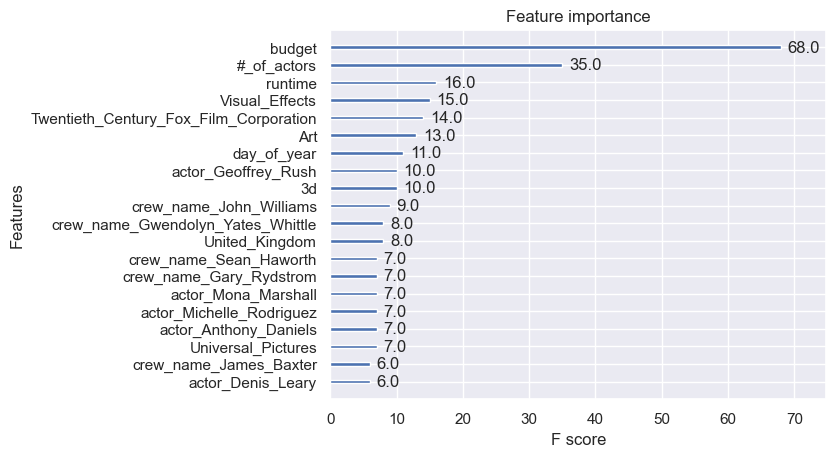

In [630]:
plot_importance(regressor,max_num_features = 20)
plt.show()

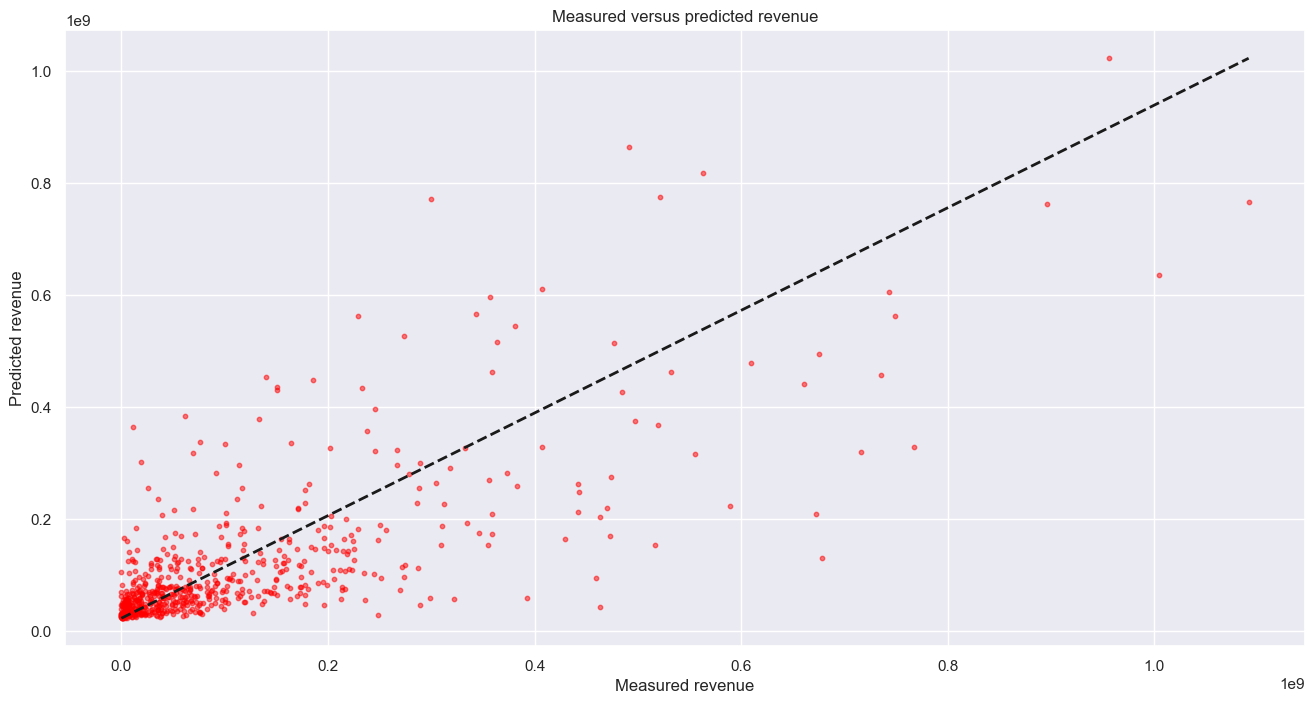

In [631]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(y_test, y_pred,alpha=0.5,s=10,c="red")
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
ax.set_xlabel('Measured revenue')
ax.set_ylabel('Predicted revenue')
plt.title('Measured versus predicted revenue')    
plt.show()

In [632]:
features=pd.Series(regressor.feature_importances_,index=X_train.columns)

In [633]:
print("features dropped when we have the cast")
set(features_no_cast[features_no_cast>0].index)-set(features[features>0].index)

features dropped when we have the cast


{'Canal+',
 'China',
 'Comedy',
 'Horror',
 'Italy',
 'Japan',
 'Music',
 'Mystery',
 'New_Line_Cinema',
 'Regency_Enterprises',
 'Spain',
 'Village_Roadshow_Pictures',
 'War',
 'Warner_Bros.',
 'independent_film',
 'love',
 'sport',
 'woman_director'}

## Rating prediction

In [634]:
X_train, X_test, y_train, y_test=preprocess(data_no_cast,"vote_average",["revenue","vote_count","vote_average","popularity"])

In [635]:
data_no_cast.shape

(3144, 79)

In [636]:
X_train.shape

(2515, 76)

In [637]:
y_pred=np.ones(y_test.shape) * np.mean(y_train)
y_pred=list(map(lambda x: round(x,1),y_pred))
print("Baseline")
adjusted_r_2(y_test,y_pred,len(y_train),1)

Baseline


-0.0004154508418732217

### Regression without cast

#### OLS

In [638]:
y_pred=sm.OLS(y_train, X_train).fit().predict(X_test)
print("OLS Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_train.shape[1]))

OLS Score: -55.535527323878874


#### Ridge Regression

Ridge Regression Score: 0.21499725311115836


Text(0, 0.5, 'Mean Squared Error')

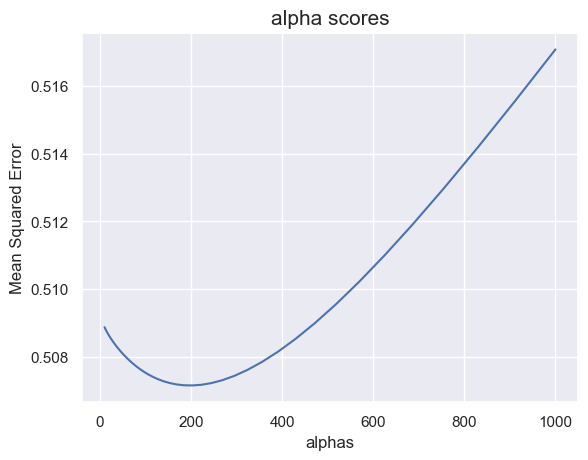

In [639]:
alphas=np.logspace(1,3,50)
clf = RidgeCV(alphas=alphas,store_cv_values=True).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Ridge Regression Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_train.shape[1]))
plt.plot(alphas,np.apply_along_axis(np.mean,0,clf.cv_values_))
plt.title("alpha scores",fontsize=15)
plt.xlabel("alphas")
plt.ylabel("Mean Squared Error")

#### XGboost

In [640]:
regressor = XGBRegressor(colsample_bytree= 1, max_depth= 6, min_child_weight= 2,
                         subsample = 0.9, objective='reg:squarederror',verbosity=1,learning_rate=0.07,randomstate=42)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
print("XGBoost retained {} features".format(sum(regressor.feature_importances_>0)))
print("XGBoost Score:",adjusted_r_2(y_test, y_pred,len(y_train),sum(regressor.feature_importances_>0)))

C:\Users\shromana\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [03:01:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "randomstate" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost retained 74 features
XGBoost Score: 0.3030289103160694


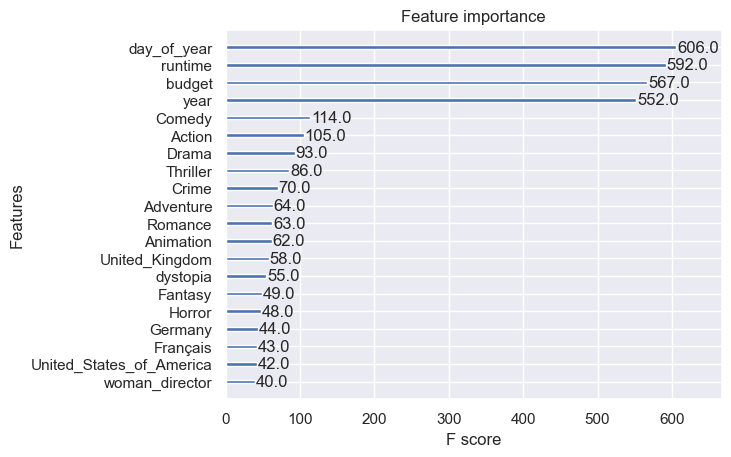

In [641]:

plot_importance(regressor,max_num_features = 20)
plt.show()

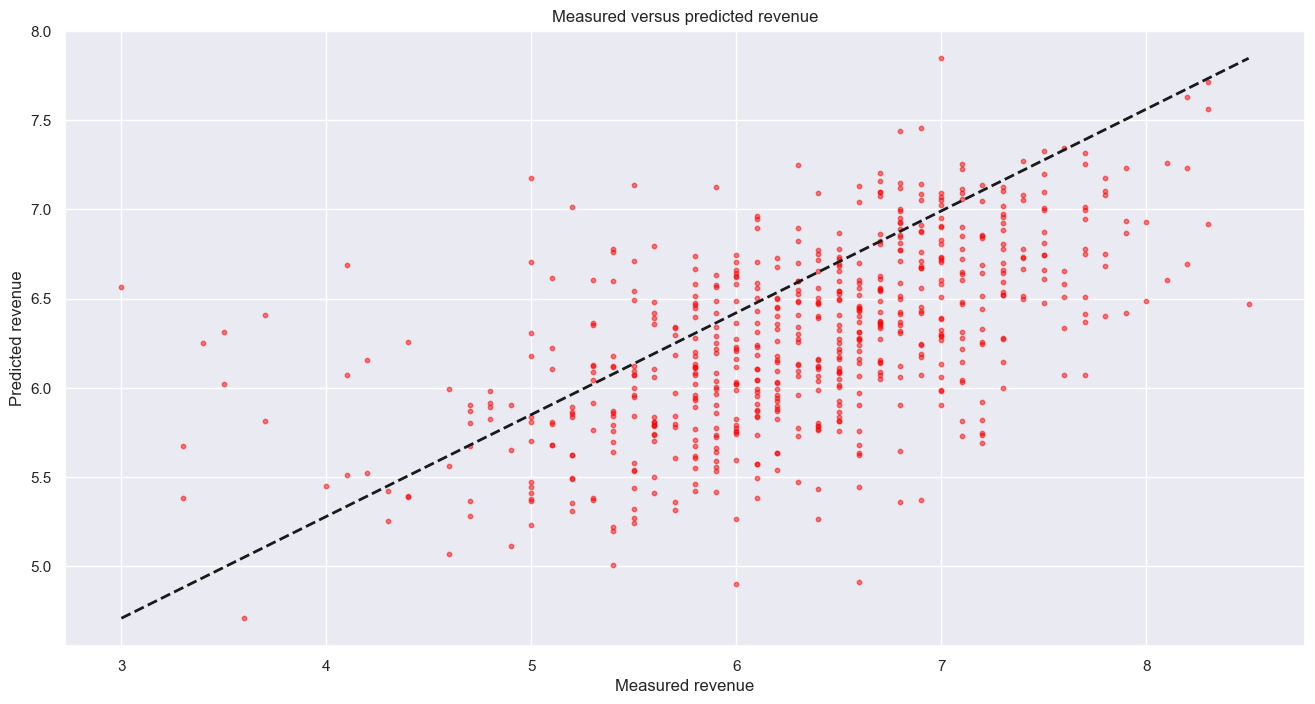

In [642]:
fig, ax = plt.subplots(figsize=(16,8))
y_pred=np.asarray(y_pred)
ax.scatter(y_test, y_pred,alpha=0.5,s=10,c="red")
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
ax.set_xlabel('Measured revenue')
ax.set_ylabel('Predicted revenue')
plt.title('Measured versus predicted revenue')    
plt.show()

In [643]:
features_no_cast=pd.Series(regressor.feature_importances_,index=X_train.columns)

### Regression with cast

In [644]:
X_train, X_test, y_train, y_test=preprocess(data,"vote_average",["revenue","vote_count","vote_average","popularity"])
X_train.shape

(2515, 1570)

#### Ridge Regression

Ridge Regression Score: -0.9764075609795553


Text(0.5, 1.0, 'alpha scores')

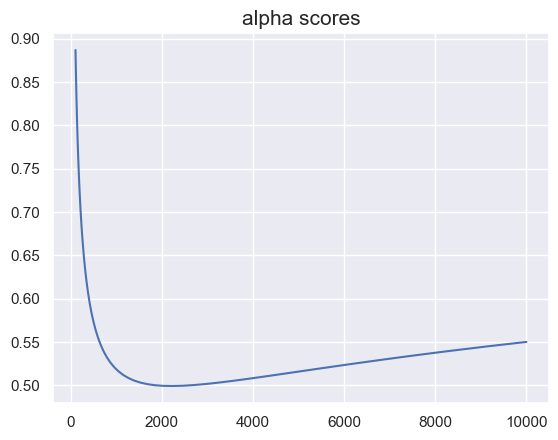

In [645]:
alphas=np.logspace(2,4,50)
clf = RidgeCV(alphas=alphas,store_cv_values=True).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Ridge Regression Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_train.shape[1]))
plt.plot(alphas,np.apply_along_axis(np.mean,0,clf.cv_values_))
plt.title("alpha scores",fontsize=15)

#### OLS

In [646]:
model = sm.OLS(y_train, X_train,hasconst=True)
result = model.fit()
y_pred=result.predict(X_test) 

print("OLS Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_train.shape[1]))

OLS Score: -5.2698576047758496e+23


##### What people dislike

In [647]:
result.params.sort_values().head(10)

crew_name_Kim_Davis-Wagner    -4.070077e+11
crew_name_Michael_G._Wilson   -3.790483e+11
actor_Mickie_McGowan          -3.682698e+11
actor_Bernard_Lee             -3.487851e+11
const                         -2.779119e+11
Crew                          -1.489896e+10
Visual_Effects                -9.767281e+09
Production                    -9.557260e+09
Sound                         -9.274777e+09
Art                           -8.988915e+09
dtype: float64

##### What people like

In [648]:
result.params.sort_values(ascending=False).head(10)

crew_name_Ian_Fleming         5.141198e+11
crew_name_Justine_Baddeley    4.250378e+11
actor_Sherry_Lynn             3.472635e+11
#_crew                        6.050818e+10
crew_name_Joel_Coen           1.670622e+09
actor_Laraine_Newman          2.258283e-01
actor_Jason_Flemyng           1.979776e-01
actor_Jackie_Sandler          1.813645e-01
actor_Mike_Myers              1.577458e-01
runtime                       1.549396e-01
dtype: float64

#### XGBoost

In [649]:

regressor = XGBRegressor(learning_rate=0.1,
                             min_child_weight=1,
                             subsample=.7,
                             colsample_bytree=1,
                             max_depth=3,
                             objective='reg:squarederror',randomstate=seed)
#regressor = XGBRegressor(objective='reg:squarederror',randomstate=seed)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
print("XGBoost retained {} features".format(sum(regressor.feature_importances_>0)))
print("XGBoost Score:",adjusted_r_2(y_test, y_pred,len(y_train),sum(regressor.feature_importances_>0)))

C:\Users\shromana\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [03:02:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "randomstate" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost retained 147 features
XGBoost Score: 0.33911964642167447


In [650]:
len(regressor.feature_importances_)

1570

In [651]:
plot_importance(regressor,max_num_features = 20)
plt.show()

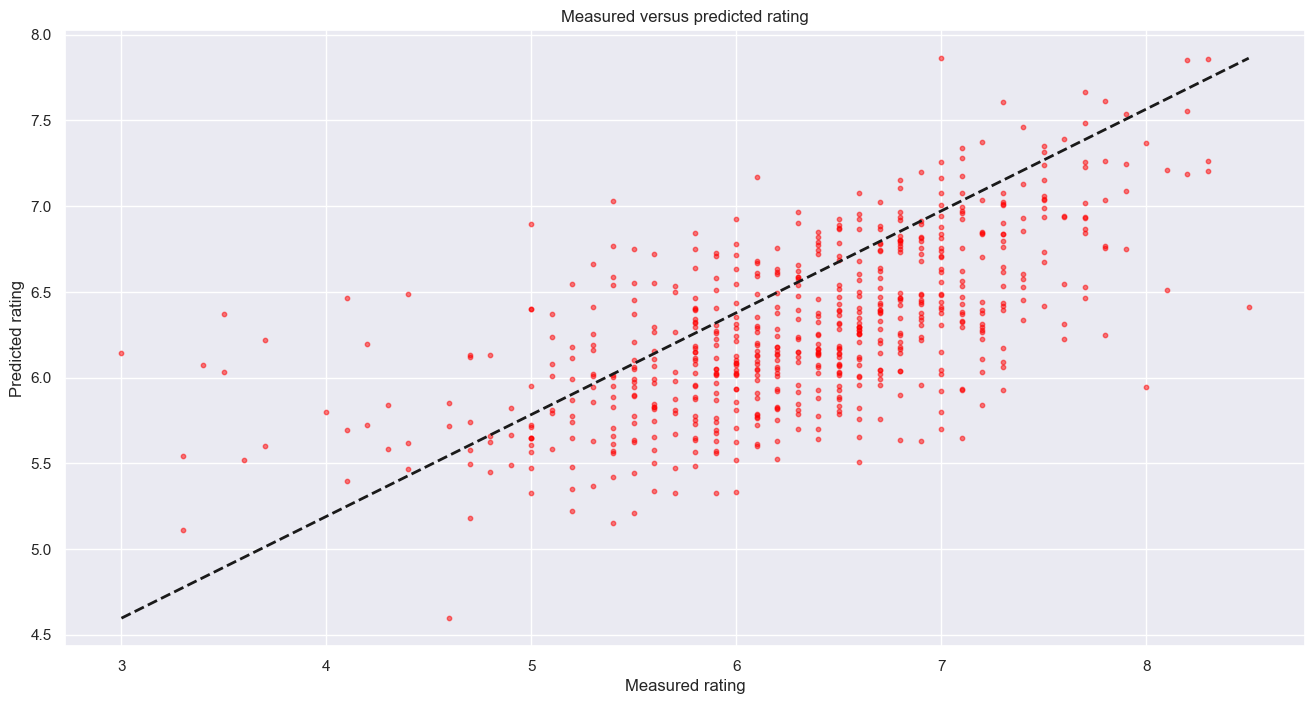

In [652]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(y_test, y_pred,alpha=0.5,s=10,c="red")
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
ax.set_xlabel('Measured rating')
ax.set_ylabel('Predicted rating')
plt.title('Measured versus predicted rating')    
plt.show()

In [653]:
features=pd.Series(regressor.feature_importances_,index=X_train.columns)

In [655]:
print("features dropped with cast")
set(features_no_cast[features_no_cast>0].index)-set(features[features>0].index)

features dropped with cast


{'Australia',
 'Canal+',
 'China',
 'Columbia_Pictures',
 'Dune_Entertainment',
 'Español',
 'Family',
 'Foreign',
 'History',
 'Italy',
 'Japan',
 'Metro-Goldwyn-Mayer_(MGM)',
 'Music',
 'Mystery',
 'New_Line_Cinema',
 'Regency_Enterprises',
 'Spain',
 'Touchstone_Pictures',
 'TriStar_Pictures',
 'United_Artists',
 'Village_Roadshow_Pictures',
 'War',
 'Western',
 'murder',
 'revenge',
 'sport',
 'superhero'}